# Тема проекта "Выявление закономерностей, определяющих успешность компьютерных игр"


# **Описание проекта**
*Заказчик исследования* - интернет-магазине «Ачивка».

Вы работаете в интернет-магазине «Ачивка», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о продажах
игр, оценки пользователей и экспертов, жанры и платформы. Вам нужно выявить
определяющие успешность игры закономерности. Это позволит сделать ставку на
потенциально популярный продукт и спланировать рекламные кампании.

# Цели и задачи проекта

**Цели проекта:**<br>
получить практические навыки самостоятельной работы с большим обЪемом данных, улучшить навык анализировать информацию и делать выводы

**Задачи проекта:**<br>
- изучить рынок компьютерных игр и выявить текущие тренды;
- установить, какие игры вызывают интерес у покупателей;
- оценить текущее состояние рынка компьютерных игр и возможные перспективы.

# **Содержание проекта**

**1. Загрузка файла с данными и изучение общей информации**<br>
<a id='загрузка_файла'></a>
[Шаг 1. Загрузка файла](#загрузка_файла_задание)<br>

**2. Предобработка данных**<br>
<a id='предобработка_данных'></a>
[Шаг 2. Предобработка данных](#предобработка_данных_задание)<br>

<a id='2.1'></a>
[2.1. Переименование столбца, изменение логики порядка столбцов в датафрейме](#2.1_задание)<br>
<a id='2.2'></a>
[2.2. Проверка на редкие и выбивающиеся значения](#2.2_задание)<br>
<a id='2.3'></a>
[2.3. Проверка типов данных](#2.3_задание)<br>
<a id='2.4'></a>
[2.4. Изучение пропусков в датафрейме](#2.4_задание)<br>
<a id='2.5'></a>
[2.5. Изучение дубликатов в датафрейме](#2.5_задание)<br>
<a id='2.6'></a>
[2.6. Изучение категориальных значений](#2.6_задание)<br>
<a id='2.7'></a>
[2.7. Проверка количественных значений](#2.7_задание)<br>
<a id='2.8'></a>
[2.8. Добавление новых столбцов](#2.8_задание)<br>

**3. Исследовательский анализ данных**<br>
<a id='исследовательский_анализ'></a>
[Шаг 3. Исследовательский анализ](#исследовательский_анализ_задание)<br>

**4. ...**<br>
<a id='...'></a>
[Шаг 4. ...](#..._задание)<br>

.......

**5. Общий вывод по проекту**<br>
<a id='общий_вывод'></a>
[Шаг 5. Общий вывод](#общий_вывод_задание)

***

Шпаргалка по анализу данных в Pandas:<br>
https://blog.skillfactory.ru/kak-nachat-analizirovat-dannye-v-pandas-pervye-shagi/ <br>
https://habr.com/ru/companies/ruvds/articles/494720/

***

# 1. Загрузка файла с данными и изучение общей информации
<a id='загрузка_файла_задание'></a>
[К содержанию](#загрузка_файла)

Сброс ограничений на количество выводимых столбцов.

In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.max_columns', None)

Установка единообразного отображения вещественных чисел с двумя знаками после запятой.

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)

**1.1.** Импорт библиотек.

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import numpy as np
import sklearn
import tqdm
import time

import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import(
    mean_squared_error,
    r2_score
)
from datetime import datetime

**1.2.** Загрузка файла с данными.

In [ ]:
data = pd.read_csv('07_games.csv')

**1.3.** Изучение общей информации о датафрейме, структуры данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16686 entries, 0 to 16685
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16684 non-null  object 
 1   Platform         16686 non-null  object 
 2   Year_of_Release  16417 non-null  float64
 3   Genre            16684 non-null  object 
 4   NA_sales         16686 non-null  float64
 5   EU_sales         16686 non-null  float64
 6   JP_sales         16686 non-null  float64
 7   Other_sales      16686 non-null  float64
 8   Critic_Score     8123 non-null   float64
 9   User_Score       9998 non-null   object 
 10  Rating           9934 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**1.4.** Знакомство с данными, вывод первых десяти строк датафрейма.

In [ ]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
1,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
2,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
3,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
4,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
5,Pokemon Gold/Pokemon Silver,GB,"1,999.00",Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
6,Wii Fit,Wii,"2,007.00",Sports,8.92,8.03,3.60,2.15,80.00,7.7,E
7,Kinect Adventures!,X360,"2,010.00",Misc,15.00,4.89,0.24,1.69,61.00,6.3,E
8,Wii Fit Plus,Wii,"2,009.00",Sports,9.01,8.49,2.53,1.77,80.00,7.4,E
9,Grand Theft Auto V,PS3,"2,013.00",Action,7.02,9.09,0.98,3.96,97.00,8.2,M


**1.5.** Знакомство с данными, вывод последних десяти строк датафрейма.

In [ ]:
data.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16676,Dynasty Warriors: Eiketsuden,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16677,Metal Gear Solid V: Ground Zeroes,PC,"2,014.00",Action,0.00,0.01,0.00,0.00,80.00,7.6,M
16678,PGA European Tour,N64,"2,000.00",Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16679,Woody Woodpecker in Crazy Castle 5,GBA,"2,002.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16680,SCORE International Baja 1000: The Official Game,PS2,"2,008.00",Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16681,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16682,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16683,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16684,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16685,Winning Post 8 2016,PSV,"2,016.00",Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN


**1.6.** Знакомство с данными, вывод случайной выборки из датафрейма.

In [ ]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3556,Cabela's Big Game Hunter 2005 Adventures,PS2,"2,004.00",Sports,0.28,0.21,0.00,0.07,55.00,8.4,T
670,Grand Theft Auto,PS,"1,997.00",Action,0.79,1.35,0.04,0.14,NaN,NaN,NaN
8032,Hatsune Miku and Future Stars: Project Mirai,3DS,"2,012.00",Misc,0.00,0.00,0.18,0.00,NaN,NaN,NaN
8711,My Baby 3 & Friends,DS,"2,010.00",Simulation,0.12,0.02,0.00,0.01,NaN,NaN,NaN
9887,Jaws: Ultimate Predator,3DS,"2,011.00",Action,0.11,0.00,0.00,0.01,NaN,tbd,M


**1.7.** Знакомство с атрибутами датафрейма.

In [ ]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [ ]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [ ]:
data.shape

(16686, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16686 entries, 0 to 16685
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16684 non-null  object 
 1   Platform         16686 non-null  object 
 2   Year_of_Release  16417 non-null  float64
 3   Genre            16684 non-null  object 
 4   NA_sales         16686 non-null  float64
 5   EU_sales         16686 non-null  float64
 6   JP_sales         16686 non-null  float64
 7   Other_sales      16686 non-null  float64
 8   Critic_Score     8123 non-null   float64
 9   User_Score       9998 non-null   object 
 10  Rating           9934 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


> **Предварительный вывод по данным**

Согласно документации к данным.
Датасет 07_games содержит информацию из реестра продажи компьюьтерных игр.


1. Name – название игры
2. Platform – платформа
3. Year_of_Release – год выпуска
4. Genre – жанр игры
5. NA_sales – продажи в Северной Америке (миллионы долларов)
6. EU_sales – продажи в Европе (миллионы долларов)
7. JP_sales – продажи в Японии (миллионы долларов)
8. Other_sales – продажи в других странах (миллионы долларов)
9. Critic_Score – оценка критиков (максимум 100)
10. User_Score – оценка пользователей (максимум 10)
11. Rating – рейтинг от организации ESRB
**Основные выводы**
1. В датафрейме **16686** записей, **11** столбцов.
2. В **Name, Year_of_Release, Genre, Critic_Scrore, User_Score, Rating** столбцах имеются **пропущенные значения**.
3. Нарушение стиля в заголовке столбца **Name, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales , Critic_Scrore, Other_sales, User_Score, Rating** , следует изменить регистр.
4. Для ряда столбцов видится возможным **Year_of_Release, User_Score, Rating** для снижения нагрузки и удобства визуализации данных (отсутствия дробных частей в лейблах/подписях).
5. В столбцах **Name, Gener, Platform** возможны дубликаты.
7. Более детально необходимо посмотреть на строковые значения в столбцах **Name, Platform, Gener** (в некоторых наименованиях в конце строки - лишний символ точки); (использование различных символов для разделения нескольких стран).

# 2. Предобработка данных
<a id='предобработка_данных_задание'></a>
[К содержанию](#предобработка_данных)

#### Шаг 2.1. Переименование столбцов, изменение логики порядка столбцов в датафрейме
<a id='2.1_задание'></a>
[К содержанию](#2.1)

Убедитесь, что в заголовках столбцов нет лишних пробелов, нарушения "змеиного регистра".

In [ ]:
data.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [ ]:
#Изменение названия колонок под стиль "змеиного регистра"
data = data.rename(columns = {'Name':'name'})
data = data.rename(columns = {'Platform':'platform'})
data = data.rename(columns = {'Year_of_Release':'year_of_release'})
data = data.rename(columns = {'Genre':'genre'})
data = data.rename(columns = {'NA_sales':'na_sales'})
data = data.rename(columns = {'EU_sales':'eu_sales'})
data = data.rename(columns = {'JP_sales':'jp_sales'})
data = data.rename(columns = {'Other_sales':'other_sales'})
data = data.rename(columns = {'Critic_Score':'critic_score'})
data = data.rename(columns = {'User_Score':'user_score'})
data = data.rename(columns = {'Rating':'rating'})
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E


Выполните предобработку данных в датафрейме - приведение строчных значений к одному (нижнему) регистру.

In [ ]:
columns_to_replace = [
  'name',
 'platform',
 'genre',
]

In [ ]:
for column in columns_to_replace:
  data[column] = data[column].str.lower()

In [ ]:
data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports resort,wii,"2,009.00",sports,15.61,10.93,3.28,2.95,80.00,8,E
1,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


***

#### Шаг 2.2. Проверка на редкие и выбивающиеся значения
<a id='2.2_задание'></a>
[К содержанию](#2.2)

Используя методы unique(), value_counts(), функцию sort_values() попробуйте выявить в датасете редкие и выбивающиеся значения. Предположите, почему эти значение могли появиться.

In [ ]:
data['platform'].unique()

array(['wii', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'ps4', '3ds',
       'n64', 'ps', 'gba', 'xb', 'pc', '2600', 'psp', 'nes', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [ ]:
data['platform'].value_counts().head(10)

ps2     2160
ds      2146
ps3     1331
wii     1315
x360    1261
psp     1208
ps      1197
pc       971
xb       824
gba      820
Name: platform, dtype: int64

In [ ]:
data['platform'].value_counts().sort_values(ascending=False)

ps2     2160
ds      2146
ps3     1331
wii     1315
x360    1261
psp     1208
ps      1197
pc       971
xb       824
gba      820
gc       554
3ds      519
psv      427
ps4      392
n64      317
xone     247
snes     239
sat      173
wiiu     147
2600     133
gb        98
nes       95
dc        52
gen       29
ng        12
scd        6
ws         6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

Самые редкие платформы: **pcfx, gg, tg16, 3do**

Скорее всего данные платформы малоизвестны, поэтому на них мало компьютерных игр.

In [ ]:
data['genre'].unique()

array(['sports', 'role-playing', 'puzzle', 'platform', 'misc', 'action',
       'racing', 'shooter', 'fighting', 'simulation', 'adventure',
       'strategy', nan], dtype=object)

In [ ]:
data['genre'].value_counts().head(10)

action          3364
sports          2346
misc            1748
role-playing    1496
shooter         1320
adventure       1301
racing          1246
platform         884
simulation       870
fighting         849
Name: genre, dtype: int64

In [ ]:
data['genre'].value_counts().sort_values(ascending=False)

action          3364
sports          2346
misc            1748
role-playing    1496
shooter         1320
adventure       1301
racing          1246
platform         884
simulation       870
fighting         849
strategy         682
puzzle           578
Name: genre, dtype: int64

Самые редкие жанры: **puzzle, strategy**

Скорее всего данные жанры не интересуют пользователей, а также возможно, что в копьютерные игры в основном играет молодежь, а для них данный жанр не интересен.

In [ ]:
data['year_of_release'].unique()

array([2009., 1996., 1989., 2006., 1999., 2007., 2010., 2013., 2004.,
       1990., 2005., 2001., 2011., 1998., 2015., 2012., 2008., 2014.,
       1992., 1997., 1993., 1994., 1982., 2016., 1988., 2003., 2002.,
       1986., 2000.,   nan, 1995., 1991., 1981., 1987., 1980., 1984.,
       1985., 1983.])

In [ ]:
data['year_of_release'].value_counts().head(10)

2,008.00    1424
2,009.00    1422
2,010.00    1255
2,007.00    1196
2,011.00    1133
2,006.00    1005
2,005.00     937
2,002.00     827
2,003.00     773
2,004.00     762
Name: year_of_release, dtype: int64

In [ ]:
data['year_of_release'].value_counts().sort_values(ascending=False)

2,008.00    1424
2,009.00    1422
2,010.00    1255
2,007.00    1196
2,011.00    1133
2,006.00    1005
2,005.00     937
2,002.00     827
2,003.00     773
2,004.00     762
2,012.00     652
2,015.00     606
2,014.00     580
2,013.00     543
2,016.00     500
2,001.00     481
1,998.00     379
2,000.00     350
1,999.00     337
1,997.00     289
1,996.00     262
1,995.00     219
1,994.00     121
1,993.00      62
1,981.00      46
1,992.00      43
1,991.00      41
1,982.00      36
1,986.00      21
1,989.00      17
1,983.00      17
1,990.00      16
1,987.00      16
1,988.00      14
1,984.00      13
1,985.00      13
1,980.00       9
Name: year_of_release, dtype: int64

Самые редкие годы релиза: **1980, 1985, 1984**

Данные годы являются самыми редкими, потому что данная индустрия была еще плохо развита

> **Предварительный вывод по шагу 2.2**

На данном этапе мы определили самые редко встречающиеся жанры игр, годы релиза и платформы, на которых выпускаются игры, это поможет нам в дальнейшем анализе.

***

#### Шаг 2.3. Проверка типов данных
<a id='2.3_задание'></a>
[К содержанию](#2.3)

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16686 entries, 0 to 16685
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16684 non-null  object 
 1   platform         16686 non-null  object 
 2   year_of_release  16417 non-null  float64
 3   genre            16684 non-null  object 
 4   na_sales         16686 non-null  float64
 5   eu_sales         16686 non-null  float64
 6   jp_sales         16686 non-null  float64
 7   other_sales      16686 non-null  float64
 8   critic_score     8123 non-null   float64
 9   user_score       9998 non-null   object 
 10  rating           9934 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


> **Предварительный вывод по шагу 2.3**

В шаге 2.3 проекта были выполнены следующие действия:
1. Была проведела оценка типа данных всех столбцов в датафрейме.
2. Так как в столбцах, где нужно было поменять тип данных были пропущены значения, то на данном этапе все осталось без изменений, в ходе работы с данными в столбцах **year_of_release, user_score** будет изменен тип данных.

***

#### Шаг 2.4. Изучение пропусков в датафрейме
<a id='2.4_задание'></a>
[К содержанию](#2.4)

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

**Объяснение было представлено выше**

**a)** Анализ количества **пропусков** в столбцах.

In [ ]:
data.isnull().sum(axis=0).sort_values(ascending=False)

critic_score       8563
rating             6752
user_score         6688
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

**b)** Расчет **количества пропущенных значений** в каждом столбце, **в процентах**.

In [ ]:
data.isnull().sum(axis=0).sort_values(ascending=False) / data.shape[0] * 100

critic_score      51.32
rating            40.47
user_score        40.08
year_of_release    1.61
name               0.01
genre              0.01
platform           0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
dtype: float64

> **Предварительный вывод**

**Вывод**<br>

- 5 столбцов не содержат пропущенных значений.
- Значительное число пропусков в 2 столбцах (40%), в одном столбце (50%)
- В столбце **name, gener** **0.01% пропусков** - **2 пропуска**. Для столбца **name** видится возможным *удалить строки*, для столбца **gener** видится возможным поиск жанра в сети Интернет.
- В столбце **year_of_release** **1,61% пропусков** возможен вариант поиска игр в сети Интернет и внесения отсутствующих значений согласно найденным на сторонних ресурсах. Но тогда придется вручную заполнять 269 записей. Для исследования год релиза игры может играть важную роль, но имеющихся 98.39% должно быть достаточно. Для данного столбца видится возможным оставить пропуски без изменений.

***

Проработайте каждый столбец по отдельности.

**c)** Столбец **user_score**.

In [ ]:
# Функция для нахождения количества пропушенных значений
def missing_values(col):
    return print (
        'Количество пропущенных значений: {} ({}%)'.format(
            data[col].isnull().sum(), round(data[col].isnull().sum() / data.shape[0] * 100, 2))
    )

In [ ]:
missing_values('user_score')

Количество пропущенных значений: 6688 (40.08%)


In [ ]:
data[data['user_score'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
2,tetris,gb,"1,989.00",puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
5,pokemon gold/pokemon silver,gb,"1,999.00",role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
11,super mario world,snes,"1,990.00",platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
13,pokemon diamond/pokemon pearl,ds,"2,006.00",role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16681,samurai warriors: sanada maru,ps3,"2,016.00",action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16682,lma manager 2007,x360,"2,006.00",sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16683,haitaka no psychedelica,psv,"2,016.00",adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16684,spirits & spells,gba,"2,003.00",platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
# Заполнение пропусков в столбце user_score
data['user_score'] = data['user_score'].fillna(-1)

In [ ]:
# Изменение типа данных в столбце user_score
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [ ]:
missing_values('user_score')

Количество пропущенных значений: 2419 (14.5%)


In [ ]:
# Заполнение пропусков в столбце user_score
data['user_score'] = data['user_score'].fillna(-1)

In [ ]:
missing_values('user_score')

Количество пропущенных значений: 0 (0.0%)


In [ ]:
# Проверка типа данных столбца user_score
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16686 entries, 0 to 16685
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16684 non-null  object 
 1   platform         16686 non-null  object 
 2   year_of_release  16417 non-null  float64
 3   genre            16684 non-null  object 
 4   na_sales         16686 non-null  float64
 5   eu_sales         16686 non-null  float64
 6   jp_sales         16686 non-null  float64
 7   other_sales      16686 non-null  float64
 8   critic_score     8123 non-null   float64
 9   user_score       16686 non-null  float64
 10  rating           9934 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


**d)** Столбец **name**.

In [ ]:
missing_values('name')

Количество пропущенных значений: 2 (0.01%)


In [ ]:
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
645,NaN,gen,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,-1.00,NaN
14229,NaN,gen,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,-1.00,NaN


Так как в данных двух строках отсутствует название и жанр игры, восстановить данные является невозможным, поэтому видится возможным удалить эти две строки.

In [ ]:
# Удаление строки
data.drop(labels=[645], axis = 0, inplace= True)

In [ ]:
# Удаление строки
data.drop(labels=[14229], axis = 0, inplace= True)

In [ ]:
# Изменение индексов
data = data.reset_index(drop=True)

In [ ]:
missing_values('name')

Количество пропущенных значений: 0 (0.0%)


**c)** Столбец **platform**.

In [ ]:
missing_values('platform')

Количество пропущенных значений: 0 (0.0%)


**c)** Столбец **year_of_release**.

In [ ]:
missing_values('year_of_release')

Количество пропущенных значений: 269 (1.61%)


In [ ]:
data[data['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
169,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.00,8.50,E
363,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.00,6.40,E
442,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.00,7.90,E10+
461,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,-1.00,NaN
595,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,-1.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16356,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.00,-1.00,E10+
16388,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.00,6.50,T
16431,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.00,6.70,M
16441,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,-1.00,NaN


In [ ]:
# Замена пропущенных значений в столбце year_of_release
data['year_of_release'] = data['year_of_release'].fillna(0)

In [ ]:
data[168:180]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
168,tomb raider ii,ps,"1,997.00",action,2.30,2.46,0.20,0.28,85.00,-1.00,T
169,madden nfl 2004,ps2,0.00,sports,4.26,0.26,0.01,0.71,94.00,8.50,E
170,tomodachi life,3ds,"2,013.00",simulation,0.97,2.11,1.90,0.24,NaN,-1.00,NaN
171,new super mario bros. u,wiiu,"2,012.00",platform,2.30,1.34,1.27,0.32,84.00,8.10,E
172,dragon quest viii: journey of the cursed king,ps2,"2,004.00",role-playing,0.65,0.75,3.61,0.20,89.00,8.80,T
173,super mario bros. 3,gba,"2,003.00",platform,2.93,1.25,0.83,0.20,NaN,-1.00,NaN
174,professor layton and the curious village,ds,"2,007.00",puzzle,1.21,2.43,1.03,0.52,85.00,8.60,E
175,super mario land 3: wario land,gb,"1,994.00",platform,2.49,0.98,1.57,0.15,NaN,-1.00,NaN
176,fifa soccer 13,x360,"2,012.00",action,1.09,3.47,0.03,0.57,90.00,6.10,E
177,donkey kong country 2: diddy's kong quest,snes,"1,995.00",platform,2.10,0.74,2.20,0.11,NaN,-1.00,NaN


In [ ]:
# Изменение типа данных в стоблце year_of_release
data['year_of_release'] = data['year_of_release'].astype(int)

In [ ]:
missing_values('year_of_release')

Количество пропущенных значений: 0 (0.0%)


Столбец **genre**

In [ ]:
missing_values('genre')

Количество пропущенных значений: 0 (0.0%)


Столбец **critic_score**

In [ ]:
missing_values('critic_score')

Количество пропущенных значений: 8561 (51.31%)


In [ ]:
data[data['critic_score'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,-1.00,NaN
2,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,-1.00,NaN
5,pokemon gold/pokemon silver,gb,1999,role-playing,9.00,6.18,7.20,0.71,NaN,-1.00,NaN
11,super mario world,snes,1990,platform,12.78,3.75,3.54,0.55,NaN,-1.00,NaN
13,pokemon diamond/pokemon pearl,ds,2006,role-playing,6.38,4.46,6.04,1.36,NaN,-1.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16679,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,-1.00,NaN
16680,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,-1.00,NaN
16681,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,-1.00,NaN
16682,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,-1.00,NaN


In [ ]:
# Замена пропущенных значений в столбце critic_score
data['critic_score'] = data['critic_score'].fillna(-1)

In [ ]:
missing_values('critic_score')

Количество пропущенных значений: 0 (0.0%)


Столбец **rating**

In [ ]:
missing_values('rating')

Количество пропущенных значений: 6750 (40.46%)


In [ ]:
data[data['rating'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,NaN
2,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.00,-1.00,NaN
5,pokemon gold/pokemon silver,gb,1999,role-playing,9.00,6.18,7.20,0.71,-1.00,-1.00,NaN
11,super mario world,snes,1990,platform,12.78,3.75,3.54,0.55,-1.00,-1.00,NaN
13,pokemon diamond/pokemon pearl,ds,2006,role-playing,6.38,4.46,6.04,1.36,-1.00,-1.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16679,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.00,-1.00,NaN
16680,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-1.00,-1.00,NaN
16681,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,NaN
16682,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,-1.00,-1.00,NaN


In [ ]:
# Замена пропущенных значений в столбце rating
data['rating'] = data['rating'].fillna('no data')

In [ ]:
data[0:5]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E
1,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,no data
2,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.00,-1.00,no data
3,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.00,8.50,E
4,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.00,6.60,E


In [ ]:
missing_values('rating')

Количество пропущенных значений: 0 (0.0%)


In [ ]:
# Проверка типов данных во всех столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16684 entries, 0 to 16683
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16684 non-null  object 
 1   platform         16684 non-null  object 
 2   year_of_release  16684 non-null  int64  
 3   genre            16684 non-null  object 
 4   na_sales         16684 non-null  float64
 5   eu_sales         16684 non-null  float64
 6   jp_sales         16684 non-null  float64
 7   other_sales      16684 non-null  float64
 8   critic_score     16684 non-null  float64
 9   user_score       16684 non-null  float64
 10  rating           16684 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


> **Предварительный вывод по шагу 2.4**

- Пропуски в столбце **user_score** были заполнены **-1**, потому что игру либо не оценили, либо оценило мало пользователей, к тому же в данном столбце было пропущено большое количесво данных, поэтому было принято решение заполнить пропуски **-1**
- В столбце **user_score** был изменен тип данных с object на float, для более удобной работы в дальнейшем
- В столбце **name** было удалено **два** столбца, так как у них отсутвовало название игры и жанр, восстановить эти данные было невозможно
- В столбце **year_of_release** пропуски были заполнены **0**, так как в данном столбце было пропущено большое количесво данных, поэтому для удобства было принято решение заполнить пропуски **0**
- В столбце **year_of_release** был изменен тип данных с float на int, для более удобной работы в дальнейшем
- Пропуски в столбце **critic_score** были заполнены **-1**, потому что игру либо не оценили, либо оценило мало критиков, к тому же в данном столбце было пропущено большое количесво данных, поэтому было принято решение заполнить пропуски **-1**
-  Пропуски в столбце **rating** были заполнены **no data**, в данном столбце было пропущено большое количесво данных, поэтому было принято решение заполнить пропуски **no data**

***

#### Шаг 2.5. Изучение дубликатов в датафрейме
<a id='2.5_задание'></a>
[К содержанию](#2.5)
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

**a)** Поиск **явных дубликатов**.

In [ ]:
print('Количество явных дубликатов в таблице:', data.duplicated().sum())

Количество явных дубликатов в таблице: 0


**b)** Проверка наличия **пустых**/почти пустых **строк**.

In [ ]:
print('Максимальное количество пустых значений в записи:', data.isnull().sum(axis=1).max())

Максимальное количество пустых значений в записи: 0


**c)** Поиск **неявных дубликатов** (по столбцам).

**Проверка столбца "name" на наличие неявных дубликатов**

In [ ]:
data['name'].sort_values().unique()

array(['.hack//g.u. vol.1//rebirth', '.hack//g.u. vol.2//reminisce',
       '.hack//g.u. vol.2//reminisce (jp sales)', ..., 'zwei!!',
       'zyuden sentai kyoryuger: game de gaburincho!!',
       '¡shin chan flipa en colores!'], dtype=object)

**Удаление лишных знаков в столбце "name"**

In [ ]:
data['name'] = data['name'].str.strip()

In [ ]:
data['name'].sort_values().unique()

array(['.hack//g.u. vol.1//rebirth', '.hack//g.u. vol.2//reminisce',
       '.hack//g.u. vol.2//reminisce (jp sales)', ..., 'zwei!!',
       'zyuden sentai kyoryuger: game de gaburincho!!',
       '¡shin chan flipa en colores!'], dtype=object)

In [ ]:
data['name'] = data['name'].str.lstrip(' !¡')

In [ ]:
data['name'] = data['name'].str.rstrip(' !¡')

In [ ]:
data['name'].sort_values().unique()

array(['.hack//g.u. vol.1//rebirth', '.hack//g.u. vol.2//reminisce',
       '.hack//g.u. vol.2//reminisce (jp sales)', ...,
       'zumba fitness: world party', 'zwei',
       'zyuden sentai kyoryuger: game de gaburincho'], dtype=object)

**Проверка столбца "platform" на наличие неявных дубликатов**

In [ ]:
data['platform'].sort_values().unique()

array(['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg',
       'n64', 'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp',
       'psv', 'sat', 'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360',
       'xb', 'xone'], dtype=object)

**Проверка столбца "genre" на наличие неявных дубликатов**

In [ ]:
data['genre'].sort_values().unique()

array(['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle',
       'racing', 'role-playing', 'shooter', 'simulation', 'sports',
       'strategy'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16684 entries, 0 to 16683
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16684 non-null  object 
 1   platform         16684 non-null  object 
 2   year_of_release  16684 non-null  int64  
 3   genre            16684 non-null  object 
 4   na_sales         16684 non-null  float64
 5   eu_sales         16684 non-null  float64
 6   jp_sales         16684 non-null  float64
 7   other_sales      16684 non-null  float64
 8   critic_score     16684 non-null  float64
 9   user_score       16684 non-null  float64
 10  rating           16684 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Проверка столбца "year_of_release" на наличие неявных дубликатов**

In [ ]:
data['year_of_release'].sort_values().unique()

array([   0, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

**Проверка столбца "rating" на наличие неявных дубликатов**

In [ ]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'no data'],
      dtype=object)

**Изменение неявного дубликата в столбце "rating"**:

In [ ]:
data['rating'] = data['rating'].str.replace('K-A', 'E10+', regex=True)

In [ ]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T', 'no data'], dtype=object)

> **Предварительный вывод по шагу 2.5**

- Явных дубликатов в таблице не выявлено
- Пустых значений в записи не выявлено
- В столбце **name** были удалены лишнии символы
- В столбце **rating** возрастной рейтинг **'K-A'** был заменен на **'E10+'**, так как возрастной рейтинг **'K-A'** является устаревшей формой рейтинга **'E10+'**


***

#### Шаг 2.6. Изучение категориальных значений
<a id='2.6_задание'></a>
[К содержанию](#2.6)
- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

Составьте список столбцов с категориальными значениями. Изучение категориальных значений пока НЕ ПРОВОДИТЕ (**шаг 2.6 пропустите**).

**Проведено в другом пункте**

***

#### Шаг 2.7. Проверка количественных значений
<a id='2.7_задание'></a>
[К содержанию](#2.7)

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

Составьте список столбцов с количественными значениями. Изучение количественных значений пока НЕ ПРОВОДИТЕ (**шаг 2.7 пропустите**).

**Проведено в другом пункте**

***

#### Шаг 2.8. Добавление новых столбцов
<a id='2.8_задание'></a>
[К содержанию](#2.8)

**2.8.1.** Добавьте столбец, в котором рассчитайте общее количество продаж во всех регионах.

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E
1,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,no data
2,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.00,-1.00,no data
3,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.00,8.50,E
4,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.00,6.60,E


In [ ]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
1,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,no data,31.38
2,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.00,-1.00,no data,30.26
3,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
4,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91


In [ ]:
missing_values('total_sales')

Количество пропущенных значений: 0 (0.0%)


**2.8.2.** Добавьте столбец с категоризацией данных по числовым диапазонам.

In [ ]:
# Функия для определения рейтинга игры
def ratings_group(critic_scores):

    if critic_scores <= 30:
        return '0.0-30.0'
    if critic_scores <= 50:
        return '30.1-50.0'
    if critic_scores <= 70:
        return '50.1-70.0'
    return '70.1-100.0'

In [ ]:
data['ratings_group'] = data['critic_score'].apply(ratings_group)
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group
4483,timesplitters,ps2,2000,shooter,0.21,0.17,0.00,0.06,81.00,8.00,T,0.44,70.1-100.0
12817,elemental gearbolt,ps,1997,shooter,0.03,0.02,0.00,0.00,76.00,-1.00,T,0.05,70.1-100.0
9325,shonen jump's one piece: grand battle,ps2,2005,fighting,0.07,0.05,0.00,0.02,-1.00,-1.00,no data,0.14,0.0-30.0
3397,kane & lynch 2: dog days,ps3,2010,shooter,0.17,0.27,0.05,0.10,-1.00,-1.00,no data,0.59,0.0-30.0
4114,double dragon,2600,1989,action,0.45,0.02,0.00,0.01,-1.00,-1.00,no data,0.48,0.0-30.0


**2.8.3.** Добавьте столбец, используя функцию для одной строки.

In [ ]:
data['total_sales'].mean()

0.512755933828818

In [ ]:
# Функция для определения является ли игра популярной
def popular_game(row):

    ratings_group = row['ratings_group']
    total_sales = row['total_sales']

    if ratings_group == '70.1-100.0':
        if total_sales >= 0.52:
            return 'popular'

        return '-'

    return '-'

In [ ]:
data['popular'] = data.apply(popular_game, axis=1)

data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
5246,farming simulator 2015,x360,2015,simulation,0.22,0.11,0.00,0.03,-1.00,-1.00,no data,0.36,0.0-30.0,-
13068,dokidoki majo shinpan,ds,2007,adventure,0.00,0.00,0.05,0.00,-1.00,-1.00,no data,0.05,0.0-30.0,-
9337,hulk hogan's main event,x360,2011,fighting,0.10,0.02,0.00,0.01,26.00,2.20,T,0.13,0.0-30.0,-
765,nba 2k12,ps3,2011,sports,1.62,0.26,0.05,0.18,90.00,6.70,E,2.11,70.1-100.0,popular
1876,nfl blitz 2000,ps,1998,sports,0.60,0.41,0.00,0.07,-1.00,-1.00,no data,1.08,0.0-30.0,-


> **Вывод к шагу 2 "Предобработка данных"**

Таким образом, в результате предобработки данных<br>
1. Все заголовки были исправлены (приведены к нижнему регистру)
2. Всё данные в датафрейме были приведены к одному (нижнему) регистру
3. Выявлены редкие значения и установлены причины их появления
4. Проведена оценка типов данных в датафрейме, а также изменение типа данных в столбцах **user_score, year_of_release**
5. Выявлены и устранены пропуски в строках и столбцах
6. Были выявлены и устранены неявные дубликаты **rating**, а также лишние символы в столбце name
7. Был добавлен столбец с общим количеством продаж во всех регионах
8. Был добавлен столбец с категоризпцией данных по оценке критиков
9. Был добавлен столбец с использованием функции для одной строки данных по оценке критиков и общим количеством продаж во всех регионах


***

**Исследовательский анализ данных(индивидуальный)**


In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
0,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77,70.1-100.0,popular
1,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,no data,31.38,0.0-30.0,-
2,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.00,-1.00,no data,30.26,0.0-30.0,-
3,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80,70.1-100.0,popular
4,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91,50.1-70.0,-


1. Рассчитайте количество выпущенных игр по годам, по платформам.


In [ ]:
data_pivot_god = data.pivot_table(
    index='year_of_release',
    values='name',
    aggfunc='count',
)
data_pivot_god

,name
year_of_release,
0,269
1980,9
1981,46
1982,36
1983,17
1984,13
1985,13
1986,21
1987,16


In [ ]:
data_pl = data.groupby('platform').agg({'name':'count'})
data_pl

,name
platform,
2600,133
3do,3
3ds,519
dc,52
ds,2146
gb,98
gba,820
gc,554
gen,27


2. Выведите список топ-5 самых продаваемых игр по годам, по платформам, по
жанрам.

a) сотрировка по годам

In [ ]:
a = data.query('year_of_release == 2016').sort_values('total_sales', ascending=False).head(5)[['year_of_release','name','total_sales']]
a

,year_of_release,name,total_sales
80,2016,fifa 17,7.60
94,2016,pokemon sun/moon,7.14
157,2016,uncharted 4: a thief's end,5.39
231,2016,call of duty: infinite warfare,4.47
275,2016,battlefield 1,4.07


In [ ]:
b = data.query('year_of_release == 2015').sort_values('total_sales', ascending=False).head(5)[['year_of_release','name','total_sales']]
b

,year_of_release,name,total_sales
20,2015,call of duty: black ops 3,14.63
63,2015,fifa 16,8.58
73,2015,star wars battlefront (2015),7.98
85,2015,call of duty: black ops 3,7.39
91,2015,fallout 4,7.17


In [ ]:
c = data.query('year_of_release == 2014').sort_values('total_sales', ascending=False).head(5)[['year_of_release','name','total_sales']]
c

,year_of_release,name,total_sales
31,2014,grand theft auto v,12.62
36,2014,pokemon omega ruby/pokemon alpha sapphire,11.68
78,2014,call of duty: advanced warfare,7.66
82,2014,super smash bros. for wii u and 3ds,7.55
96,2014,mario kart 8,7.09


In [ ]:
d = data.query('year_of_release == 2013').sort_values('total_sales', ascending=False).head(5)[['year_of_release','name','total_sales']]
d

,year_of_release,name,total_sales
9,2013,grand theft auto v,21.05
22,2013,pokemon x/pokemon y,14.60
49,2013,call of duty: ghosts,10.24
55,2013,call of duty: ghosts,9.36
58,2013,minecraft,9.18


In [ ]:
e = data.query('year_of_release == 2012').sort_values('total_sales', ascending=False).head(5)[['year_of_release','name','total_sales']]
e

,year_of_release,name,total_sales
23,2012,call of duty: black ops ii,13.79
24,2012,call of duty: black ops ii,13.68
52,2012,halo 4,9.71
59,2012,animal crossing: new leaf,9.17
67,2012,fifa soccer 13,8.17


In [ ]:
year = pd.concat([a,b,c,d,e], sort=False, axis=0)
year

,year_of_release,name,total_sales
80,2016,fifa 17,7.60
94,2016,pokemon sun/moon,7.14
157,2016,uncharted 4: a thief's end,5.39
231,2016,call of duty: infinite warfare,4.47
275,2016,battlefield 1,4.07
20,2015,call of duty: black ops 3,14.63
63,2015,fifa 16,8.58
73,2015,star wars battlefront (2015),7.98
85,2015,call of duty: black ops 3,7.39
91,2015,fallout 4,7.17


In [ ]:
data_pivot_year = year.pivot_table(
    index=['year_of_release','name'], values=['total_sales']
)
data_pivot_year


total_sales
year_of_release name                                                  
2012            animal crossing: new leaf                         9.17
                call of duty: black ops ii                       13.73
                fifa soccer 13                                    8.17
                halo 4                                            9.71
2013            call of duty: ghosts                              9.80
                grand theft auto v                               21.05
                minecraft                                         9.18
                pokemon x/pokemon y                              14.60
2014            call of duty: advanced warfare                    7.66
                grand theft auto v                               12.62
                mario kart 8                                      7.09
                pokemon omega ruby/pokemon alpha sapphire        11.68
                super smash bros. for wii u and 3ds               7.55
2015            call of duty: black ops 3                        11.01
                fallout 4                                         7.17
                fifa 16                                           8.58
                star wars battlefront (2015)                      7.98
2016            battlefield 1                                     4.07
                call of duty: infinite warfare                    4.47
                fifa 17                                           7.60
                pokemon sun/moon                                  7.14
                uncharted 4: a thief's end                        5.39

б) сортировка по платформе

In [ ]:
data_plat=data.query('year_of_release <=2016 and year_of_release >=2012')
data_plat['platform'].sort_values().unique().tolist()

['3ds', 'ds', 'pc', 'ps3', 'ps4', 'psp', 'psv', 'wii', 'wiiu', 'x360', 'xone']

In [ ]:
a = data_plat.query('platform == "3ds"').sort_values('total_sales', ascending=False).head(5)[['platform','name','total_sales']]

In [ ]:
b = data_plat.query('platform == "ds"').sort_values('total_sales', ascending=False).head(5)[['platform','name','total_sales']]

In [ ]:
c = data_plat.query('platform == "ps"').sort_values('total_sales', ascending=False).head(5)[['platform','name','total_sales']]

In [ ]:
d = data_plat.query('platform == "ps3"').sort_values('total_sales', ascending=False).head(5)[['platform','name','total_sales']]

In [ ]:
e = data_plat.query('platform == "ps4"').sort_values('total_sales', ascending=False).head(5)[['platform','name','total_sales']]

In [ ]:
f = data_plat.query('platform == "psp"').sort_values('total_sales', ascending=False).head(5)[['platform','name','total_sales']]

In [ ]:
q = data_plat.query('platform == "psv"').sort_values('total_sales', ascending=False).head(5)[['platform','name','total_sales']]

In [ ]:
w = data_plat.query('platform == "wii"').sort_values('total_sales', ascending=False).head(5)[['platform','name','total_sales']]

In [ ]:
r = data_plat.query('platform == "wiiu"').sort_values('total_sales', ascending=False).head(5)[['platform','name','total_sales']]

In [ ]:
p = data_plat.query('platform == "x360"').sort_values('total_sales', ascending=False).head(5)[['platform','name','total_sales']]

In [ ]:
z = data_plat.query('platform == "xone"').sort_values('total_sales', ascending=False).head(5)[['platform','name','total_sales']]

In [ ]:
plat = pd.concat([a,b,c,d,e,f,q,w,r,p,z], sort=False, axis=0)
plat

,platform,name,total_sales
22,3ds,pokemon x/pokemon y,14.60
36,3ds,pokemon omega ruby/pokemon alpha sapphire,11.68
59,3ds,animal crossing: new leaf,9.17
82,3ds,super smash bros. for wii u and 3ds,7.55
94,3ds,pokemon sun/moon,7.14
69,ds,pokemon black 2/pokemon white 2,8.06
2024,ds,pokemon conquest,1.02
2948,ds,lego batman 2: dc super heroes,0.69
3847,ds,frozen: olaf's quest,0.51
4830,ds,moshi monsters: moshlings theme park,0.40


в) сортировка по жанру

In [ ]:
data_genre=data.query('year_of_release <=2016 and year_of_release >=2012')
data_genre['genre'].sort_values().unique().tolist()

['action',
 'adventure',
 'fighting',
 'misc',
 'platform',
 'puzzle',
 'racing',
 'role-playing',
 'shooter',
 'simulation',
 'sports',
 'strategy']

In [ ]:
a = data_genre.query('genre == "action"').sort_values('total_sales', ascending=False).head(5)[['genre','name','total_sales']]

In [ ]:
b = data_genre.query('genre == "adventure"').sort_values('total_sales', ascending=False).head(5)[['genre','name','total_sales']]

In [ ]:
q = data_genre.query('genre == "fighting"').sort_values('total_sales', ascending=False).head(5)[['genre','name','total_sales']]

In [ ]:
w = data_genre.query('genre == "misc"').sort_values('total_sales', ascending=False).head(5)[['genre','name','total_sales']]

In [ ]:
e = data_genre.query('genre == "platform"').sort_values('total_sales', ascending=False).head(5)[['genre','name','total_sales']]

In [ ]:
r = data_genre.query('genre == "puzzle"').sort_values('total_sales', ascending=False).head(5)[['genre','name','total_sales']]

In [ ]:
t = data_genre.query('genre == "racing"').sort_values('total_sales', ascending=False).head(5)[['genre','name','total_sales']]

In [ ]:
y = data_genre.query('genre == "role-playing"').sort_values('total_sales', ascending=False).head(5)[['genre','name','total_sales']]

In [ ]:
u = data_genre.query('genre == "shooter"').sort_values('total_sales', ascending=False).head(5)[['genre','name','total_sales']]

In [ ]:
p = data_genre.query('genre == "simulation"').sort_values('total_sales', ascending=False).head(5)[['genre','name','total_sales']]

In [ ]:
s = data_genre.query('genre == "sports"').sort_values('total_sales', ascending=False).head(5)[['genre','name','total_sales']]

In [ ]:
d = data_genre.query('genre == "strategy"').sort_values('total_sales', ascending=False).head(5)[['genre','name','total_sales']]

In [ ]:
gan = pd.concat([a,b,q,w,e,r,t,y,u,p,s,d], sort=False, axis=0)
gan

,genre,name,total_sales
9,action,grand theft auto v,21.05
31,action,grand theft auto v,12.62
67,action,fifa soccer 13,8.17
113,action,assassin's creed iii,6.44
135,action,the last of us,5.86
1082,adventure,until dawn,1.66
1112,adventure,beyond: two souls,1.64
1388,adventure,rise of the tomb raider,1.38
2189,adventure,rise of the tomb raider,0.94
2225,adventure,disney magical world,0.93


3. Узнайте, на какой платформе было выпущено больше всего игр.


In [ ]:
platform_counts = data['platform'].value_counts()
most_common_platform = platform_counts.idxmax()
print(f"На платформе {most_common_platform} было выпущено больше всего игр")
print(platform_counts)

На платформе ps2 было выпущено больше всего игр
ps2     2160
ds      2146
ps3     1331
wii     1315
x360    1261
psp     1208
ps      1197
pc       971
xb       824
gba      820
gc       554
3ds      519
psv      427
ps4      392
n64      317
xone     247
snes     239
sat      173
wiiu     147
2600     133
gb        98
nes       95
dc        52
gen       27
ng        12
scd        6
ws         6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64


4. Определите, игр какого жанра больше всего.


In [ ]:
genre_counts = data['genre'].value_counts()
most_common_genre = genre_counts.idxmax()
print(f"Игр жанра {most_common_genre} больше всего игр")
print(genre_counts)

Игр жанра action больше всего игр
action          3364
sports          2346
misc            1748
role-playing    1496
shooter         1320
adventure       1301
racing          1246
platform         884
simulation       870
fighting         849
strategy         682
puzzle           578
Name: genre, dtype: int64


5. Найдите игры с наибольшей и наименьшей оценкой от пользователей.

In [ ]:
max_rating_index = data['user_score'].idxmax()
min_rating_index = data[data['user_score'] != -1]['user_score'].idxmin()
max_rating_game = data.loc[max_rating_index, 'name']
min_rating_game = data.loc[min_rating_index, 'name']
max_rating = data.loc[max_rating_index, 'user_score']
min_rating = data.loc[min_rating_index, 'user_score']
print(f'Игра с наибольшей оценкой: {max_rating_game}, Рейтинг: {max_rating}')
print(f'Игра с наименьшей оценкой: {min_rating_game}, Рейтинг: {min_rating}')

Игра с наибольшей оценкой: breath of fire iii, Рейтинг: 9.7
Игра с наименьшей оценкой: my little pony: pinkie pie's party, Рейтинг: 0.0


6. Найдите игры с наибольшей и наименьшей оценкой от критиков.

In [ ]:
max_rating_index = data['critic_score'].idxmax()
min_rating_index = data[data['critic_score'] != -1]['critic_score'].idxmin()
max_rating_game = data.loc[max_rating_index, 'name']
min_rating_game = data.loc[min_rating_index, 'name']
max_rating = data.loc[max_rating_index, 'critic_score']
min_rating = data.loc[min_rating_index, 'critic_score']
print(f'Игра с наибольшей оценкой: {max_rating_game}, Рейтинг: {max_rating}')
print(f'Игра с наименьшей оценкой: {min_rating_game}, Рейтинг: {min_rating}')

Игра с наибольшей оценкой: grand theft auto iv, Рейтинг: 98.0
Игра с наименьшей оценкой: ride to hell, Рейтинг: 13.0


# 3. Исследовательский анализ данных
<a id='исследовательский_анализ_задание'></a>
[К содержанию](#исследовательский_анализ)

**3.1.** Выполните исследование данных в датафрейме с использованием индексации по координатам.

In [ ]:
data.loc[45, 'name']

'super mario all-stars'

**3.2.** Выполните исследование данных в датафрейме с использованием логической индексации (не менее 3ех фильтров).

In [ ]:
data.loc[data.loc[:, 'platform'] == 'x360']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
7,kinect adventures,x360,2010,misc,15.00,4.89,0.24,1.69,61.00,6.30,E,21.82,50.1-70.0,-
18,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88.00,3.40,M,14.73,70.1-100.0,popular
21,call of duty: black ops,x360,2010,shooter,9.70,3.68,0.11,1.13,87.00,6.30,M,14.62,70.1-100.0,popular
24,call of duty: black ops ii,x360,2012,shooter,8.25,4.24,0.07,1.12,83.00,4.80,M,13.68,70.1-100.0,popular
25,call of duty: modern warfare 2,x360,2009,shooter,8.52,3.59,0.08,1.28,94.00,6.30,M,13.47,70.1-100.0,popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,dragon ball z for kinect,x360,2012,fighting,0.01,0.00,0.00,0.00,49.00,2.10,T,0.01,30.1-50.0,-
16605,world snooker championship 2007,x360,2007,sports,0.00,0.01,0.00,0.00,-1.00,-1.00,no data,0.01,0.0-30.0,-
16630,metal gear solid hd edition,x360,2011,action,0.00,0.00,0.01,0.00,-1.00,-1.00,M,0.01,0.0-30.0,-
16637,ben 10 omniverse 2,x360,2013,action,0.00,0.01,0.00,0.00,-1.00,5.10,E10+,0.01,0.0-30.0,-


In [ ]:
data.loc[data['na_sales'] >= 15]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
0,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77,70.1-100.0,popular
2,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.00,-1.00,no data,30.26,0.0-30.0,-
7,kinect adventures,x360,2010,misc,15.00,4.89,0.24,1.69,61.00,6.30,E,21.82,50.1-70.0,-


In [ ]:
data_filtr = data[data['total_sales'] >= 10.4]
data_filtr = data_filtr[data_filtr['genre'] == 'action']
data_filtr

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
9,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05,70.1-100.0,popular
10,grand theft auto: san andreas,ps2,2004,action,9.43,0.40,0.41,10.57,95.00,9.00,M,20.81,70.1-100.0,popular
27,grand theft auto iii,ps2,2001,action,6.99,4.51,0.30,1.30,97.00,8.50,M,13.10,70.1-100.0,popular
31,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62,70.1-100.0,popular
35,pokemon heartgold/pokemon soulsilver,ds,2009,action,4.34,2.71,3.96,0.76,-1.00,-1.00,no data,11.77,0.0-30.0,-
40,grand theft auto iv,x360,2008,action,6.76,3.07,0.14,1.03,98.00,7.90,M,11.00,70.1-100.0,popular
46,grand theft auto iv,ps3,2008,action,4.76,3.69,0.44,1.61,98.00,7.50,M,10.50,70.1-100.0,popular


**3.3.** Выполните исследование данных в датафрейме с использованием сводных таблиц (не менее 3ех сводных с различной структурой). В одной из сводных рассчитайте процентное соотношение.

In [ ]:
data_pivot = data.pivot_table(
    index='name', values='total_sales', aggfunc='max'
)
data_pivot

,total_sales
name,
.hack//g.u. vol.1//rebirth,0.17
.hack//g.u. vol.2//reminisce,0.23
.hack//g.u. vol.2//reminisce (jp sales),0.16
.hack//g.u. vol.3//redemption,0.17
.hack//infection part 1,1.26
...,...
zumba fitness core,0.07
zumba fitness rush,0.18
zumba fitness: world party,0.24


In [ ]:
data_pivot_ratings = data.pivot_table(
    index=['year_of_release', 'platform'], values='na_sales', aggfunc='mean'
)

data_pivot_ratings

na_sales
year_of_release platform          
0               2600          0.58
                3ds           0.10
                ds            0.07
                gb            0.68
                gba           0.31
...                            ...
2016            psv           0.00
                wii           0.06
                wiiu          0.15
                x360          0.05
                xone          0.16

[254 rows x 1 columns]

In [ ]:
data_p = data.pivot_table(
    index='platform',
    values='genre',
    aggfunc='count',
)
data_p.columns = ['count_game']
data_p['count_game,%'] = (data_p['count_game']/data.shape[0]*100)
data_p

,count_game,"count_game,%"
platform,,
2600,133,0.80
3do,3,0.02
3ds,519,3.11
dc,52,0.31
ds,2146,12.86
gb,98,0.59
gba,820,4.91
gc,554,3.32
gen,27,0.16


**3.4.** Выполните исследование данных в датафрейме с использованием методов groupby() и agg() (не менее 3ех сгруппированных таблиц с различной структурой). В одной из таблиц добавьте расчетный столбец.

In [ ]:
data_p = data.groupby(['year_of_release', 'genre']).agg({'genre':'count'})
data_p

genre
year_of_release genre              
0               action           62
                adventure        10
                fighting         12
                misc             29
                platform         10
...                             ...
2016            role-playing     54
                shooter          47
                simulation       18
                sports           48
                strategy         13

[399 rows x 1 columns]

In [ ]:
data_p = data.groupby('genre').agg({'jp_sales':'mean'})
data_p

,jp_sales
genre,
action,0.05
adventure,0.04
fighting,0.10
misc,0.06
platform,0.13
puzzle,0.10
racing,0.04
role-playing,0.23
shooter,0.03


In [ ]:
data_p = data.groupby(['platform', 'genre']).agg({'na_sales':'sum', 'jp_sales':'sum'})
data_p['total'] = (data_p['na_sales'] + data_p['jp_sales'])
data_p

na_sales  jp_sales  total
platform genre                                  
2600     action           27.39      0.00  27.39
         adventure         1.59      0.00   1.59
         fighting          1.16      0.00   1.16
         misc              3.34      0.00   3.34
         platform         12.38      0.00  12.38
...                         ...       ...    ...
xone     role-playing      6.15      0.01   6.16
         shooter          36.86      0.16  37.02
         simulation        0.32      0.00   0.32
         sports           15.59      0.02  15.61
         strategy          0.27      0.00   0.27

[293 rows x 3 columns]

Таким образом,<br>
- В Северной Америке игры на многих платформах имеют большую популярность
- Многие платформы в Японии, например 2600, являются не прибыльными
- Самым прибыльным жанром в Японии является role-playing

**3.3.**  С помощью сводной таблицы посчитайте **среднюю и медианную сумму сборов** для каждого года.

In [ ]:
data_p = data.pivot_table(values=['na_sales', 'jp_sales', 'eu_sales', 'other_sales'], index='year_of_release', aggfunc=['mean', 'median'])
data_p

mean                                 median           \
                eu_sales jp_sales na_sales other_sales eu_sales jp_sales   
year_of_release                                                            
0                   0.09     0.02     0.22        0.03     0.02     0.00   
1980                0.07     0.00     1.18        0.01     0.04     0.00   
1981                0.04     0.00     0.73        0.01     0.03     0.00   
1982                0.05     0.00     0.75        0.01     0.03     0.00   
1983                0.05     0.48     0.46        0.01     0.03     0.00   
1984                0.11     1.08     0.49        0.02     0.08     1.10   
1985                0.09     0.60     0.36        0.01     0.03     0.43   
1986                0.14     0.94     0.60        0.09     0.02     1.00   
1987                0.09     0.73     0.53        0.01     0.02     0.43   
1988                0.23     0.85     1.02        0.04     0.09     0.73   
1989                0.50     1.08     2.66        0.09     0.30     0.65   
1990                0.48     0.93     1.59        0.09     0.18     0.53   
1991                0.10     0.36     0.31        0.02     0.00     0.28   
1992                0.27     0.67     0.79        0.04     0.00     0.29   
1993                0.08     0.42     0.25        0.01     0.00     0.21   
1994                0.12     0.28     0.23        0.02     0.00     0.14   
1995                0.07     0.21     0.11        0.01     0.00     0.08   
1996                0.17     0.21     0.31        0.03     0.03     0.04   
1997                0.17     0.17     0.33        0.03     0.04     0.00   
1998                0.18     0.13     0.34        0.03     0.04     0.00   
1999                0.19     0.16     0.37        0.03     0.05     0.00   
2000                0.15     0.12     0.27        0.03     0.06     0.00   
2001                0.20     0.08     0.36        0.05     0.06     0.00   
2002                0.12     0.04     0.24        0.03     0.04     0.00   
2003                0.13     0.04     0.25        0.03     0.04     0.00   
2004                0.14     0.05     0.29        0.06     0.05     0.00   
2005                0.11     0.05     0.24        0.04     0.03     0.00   
2006                0.10     0.07     0.22        0.05     0.01     0.00   
2007                0.13     0.05     0.26        0.06     0.00     0.00   
2008                0.12     0.04     0.23        0.05     0.01     0.00   
2009                0.13     0.04     0.23        0.05     0.01     0.00   
2010                0.14     0.05     0.24        0.05     0.02     0.00   
2011                0.14     0.05     0.21        0.05     0.03     0.00   
2012                0.17     0.08     0.23        0.05     0.02     0.02   
2013                0.21     0.09     0.27        0.07     0.04     0.01   
2014                0.21     0.07     0.23        0.06     0.04     0.01   
2015                0.16     0.06     0.18        0.05     0.02     0.01   
2016                0.10     0.04     0.09        0.03     0.01     0.00   

                                      
                na_sales other_sales  
year_of_release                       
0                   0.09        0.01  
1980                0.72        0.01  
1981                0.43        0.00  
1982                0.50        0.01  
1983                0.43        0.01  
1984                0.27        0.02  
1985                0.18        0.00  
1986                0.32        0.01  
1987                0.37        0.00  
1988                0.53        0.01  
1989                0.66        0.04  
1990                0.68        0.03  
1991                0.00        0.00  
1992                0.02        0.00  
1993                0.00        0.00  
1994                0.00        0.00  
1995                0.00        0.00  
1996                0.04        0.01  
1997                0.07        0.01  
1998                0.08        0.01  
1999  

> **Вывод к шагу 3 "Исследовательский анализ данных"**

1. На платформе **ps2** было выпущено больше всего игр - **12.95%** от всех выпущенных игр
2. Наибольшее среднее значение по продажам в Японии принадлежит платформе **role-playing**
3. Самым популярным жанром игр в Японии является **role-playing**
4. Практически во всех странах средние продажи больше медианы суммы сборов

***

# 4.  Графический анализ данных.
<a id='..._задание'></a>
[К содержанию](#...)<br><br>



Для сводной таблицы к заданию «Рассчитайте количество выпущенных игр по
годам» постройте наиболее подходящий график. Выполните его настройку (подписи осей,
легенда, заголовок графика, подписи элементов графика (столбцов и др.) и т.д.).

***

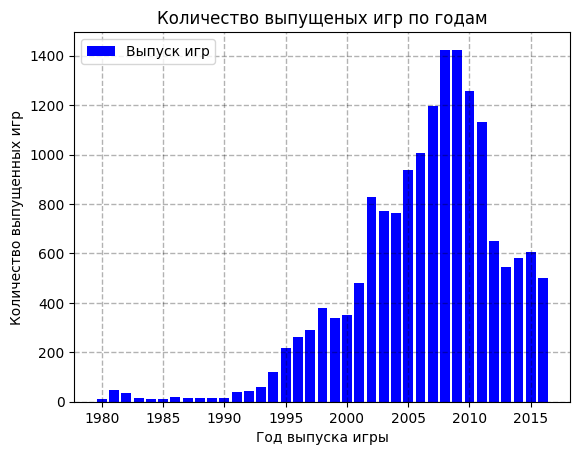

In [ ]:
data_god = data[data['year_of_release'] != 0]
data_game = data_god['year_of_release'].value_counts().sort_index()
plt.bar(data_game.index, data_game.values, color='blue', alpha=1)
plt.title('Количество выпущеных игр по годам')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.grid(True, color='black', alpha=0.3, linestyle='--', linewidth=1)
plt.legend(['Выпуск игр'])
plt.show()

Для сводной таблицы к заданию «Рассчитайте количество выпущенных игр по
платформам» постройте наиболее подходящий график. Выполните его настройку
(подписи осей, легенда, заголовок графика, подписи элементов графика (столбцов и др.) и
т.д.).


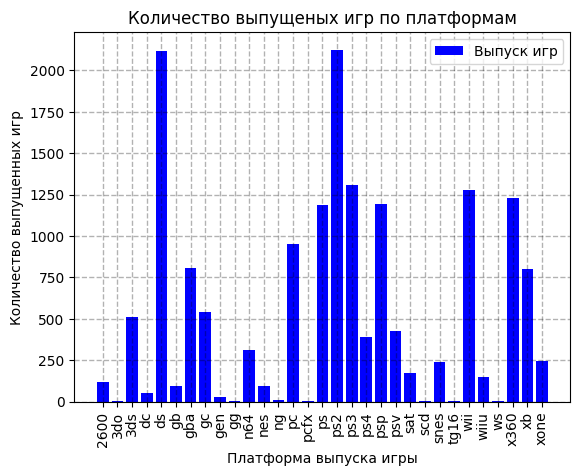

In [ ]:
data_pl = data_god['platform'].value_counts().sort_index()
plt.bar(data_pl.index, data_pl.values, color='blue', alpha=1)
plt.title('Количество выпущеных игр по платформам')
plt.xlabel('Платформа выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.xticks(rotation=90)
plt.grid(True, color='black', alpha=0.3, linestyle='--', linewidth=1)
plt.legend(['Выпуск игр'])
plt.show()

Создайте не менее пяти запросов с использованием метода query(). Сделайте выводы по полученным данным.

In [ ]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
0,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77,70.1-100.0,popular
1,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,no data,31.38,0.0-30.0,-
2,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.00,-1.00,no data,30.26,0.0-30.0,-
3,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80,70.1-100.0,popular
4,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91,50.1-70.0,-


In [ ]:
data.query('genre == "sports" and platform == "ds" and total_sales >= 4')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
184,mario & sonic at the olympic games,ds,2008,sports,1.63,2.45,0.44,0.57,-1.00,-1.00,no data,5.09,0.0-30.0,-


Из полученных данных можно сделать вывод, что игр в жанре "sports", выпущенных на платформе "ds" и собравших более 4 миллионов долларов, было выпущено всего 1

In [ ]:
data.query(
    'platform == "gb" and na_sales >=4.5 and \
    eu_sales >= 4.5 and jp_sales >= 4.5'
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
1,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,no data,31.38,0.0-30.0,-
5,pokemon gold/pokemon silver,gb,1999,role-playing,9.00,6.18,7.20,0.71,-1.00,-1.00,no data,23.09,0.0-30.0,-


Из полученных данных можно сделать вывод, что всего 2 игры, выпущенных на платформе "gb", собрали более 4.5 миллионов долларов в Северной Америке, Японии и Европе

In [ ]:
data.query(
    'user_score >= 6 and \
    genre in ["action", "misc", "fighting", "sports"]'
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
0,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77,70.1-100.0,popular
4,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91,50.1-70.0,-
6,wii fit,wii,2007,sports,8.92,8.03,3.60,2.15,80.00,7.70,E,22.70,70.1-100.0,popular
7,kinect adventures,x360,2010,misc,15.00,4.89,0.24,1.69,61.00,6.30,E,21.82,50.1-70.0,-
8,wii fit plus,wii,2009,sports,9.01,8.49,2.53,1.77,80.00,7.40,E,21.80,70.1-100.0,popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16626,rugby challenge 3,xone,2016,sports,0.00,0.01,0.00,0.00,-1.00,6.60,E,0.01,0.0-30.0,-
16635,fast racing neo,wiiu,2016,action,0.00,0.01,0.00,0.00,81.00,8.50,E,0.01,70.1-100.0,-
16643,prison architect,xone,2016,action,0.01,0.00,0.00,0.00,74.00,6.70,no data,0.01,70.1-100.0,-
16656,mortal kombat: deadly alliance,gba,2002,fighting,0.01,0.00,0.00,0.00,81.00,8.80,M,0.01,70.1-100.0,-


Из полученных данных можно сделать вывод, что довольно большое количество игр (а именно 3009 игр), относящихся в жанрам "action", "misc", "fighting", "sports", имеют оценку пользователей больше 6

In [ ]:
data.query(
    'year_of_release == 2012 and rating == "E" and \
    platform == "x360" and total_sales >= 4'
)['name'].count()

1

Из полученных данных можно сделать вывод, что игр, выпущенных в 2012 году на платформе "x360", имеющих рейтинг "E" и собравих более 4 миллионов долларов, было выпущено 1 штука

In [ ]:
data.query(
    'platform == "wii" and year_of_release == 2014'
)['total_sales'].sum()

3.75

Из полученных данных можно сделать вывод, что общая сумма с продаж игр, выпущенных в 2014 году на платформе "wii", равна 3.75 миллиона долларов

###**Выполните исследовательский анализ данных с использованием ранее изученных методов и графиков.**

<Axes: >

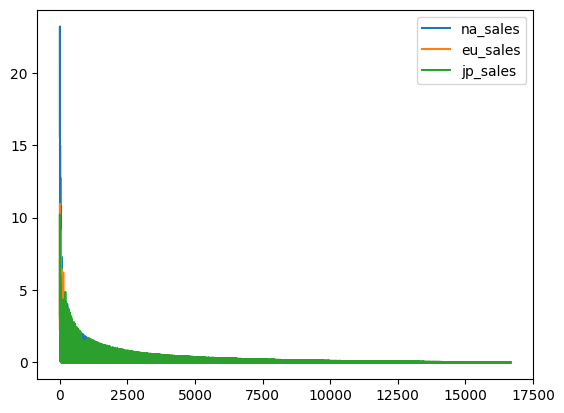

In [ ]:
s = data[['na_sales','eu_sales','jp_sales']]
s.plot()

Определим самую продаваемую игру в разных странах

In [ ]:
data.sort_values('na_sales', ascending=False).head(1)[['name','na_sales']]

,name,na_sales
2,tetris,23.20


In [ ]:
data.sort_values('eu_sales', ascending=False).head(1)[['name','eu_sales']]

,name,eu_sales
0,wii sports resort,10.93


In [ ]:
data.sort_values('jp_sales', ascending=False).head(1)[['name','jp_sales']]

,name,jp_sales
1,pokemon red/pokemon blue,10.22


In [ ]:
data.sort_values('other_sales', ascending=False).head(1)[['name','other_sales']]

,name,other_sales
10,grand theft auto: san andreas,10.57


In [ ]:
data.sort_values('total_sales', ascending=False).head(1)[['name','total_sales']]

,name,total_sales
0,wii sports resort,32.77


Мы видим, что одна игра("wil sports resort"), которая является самой популярной в Северной Америке,  является самой продаваемой во всем мире

Теперь посмотрим какой жанр игр является самым популярным во всем мире и в отдельных странах

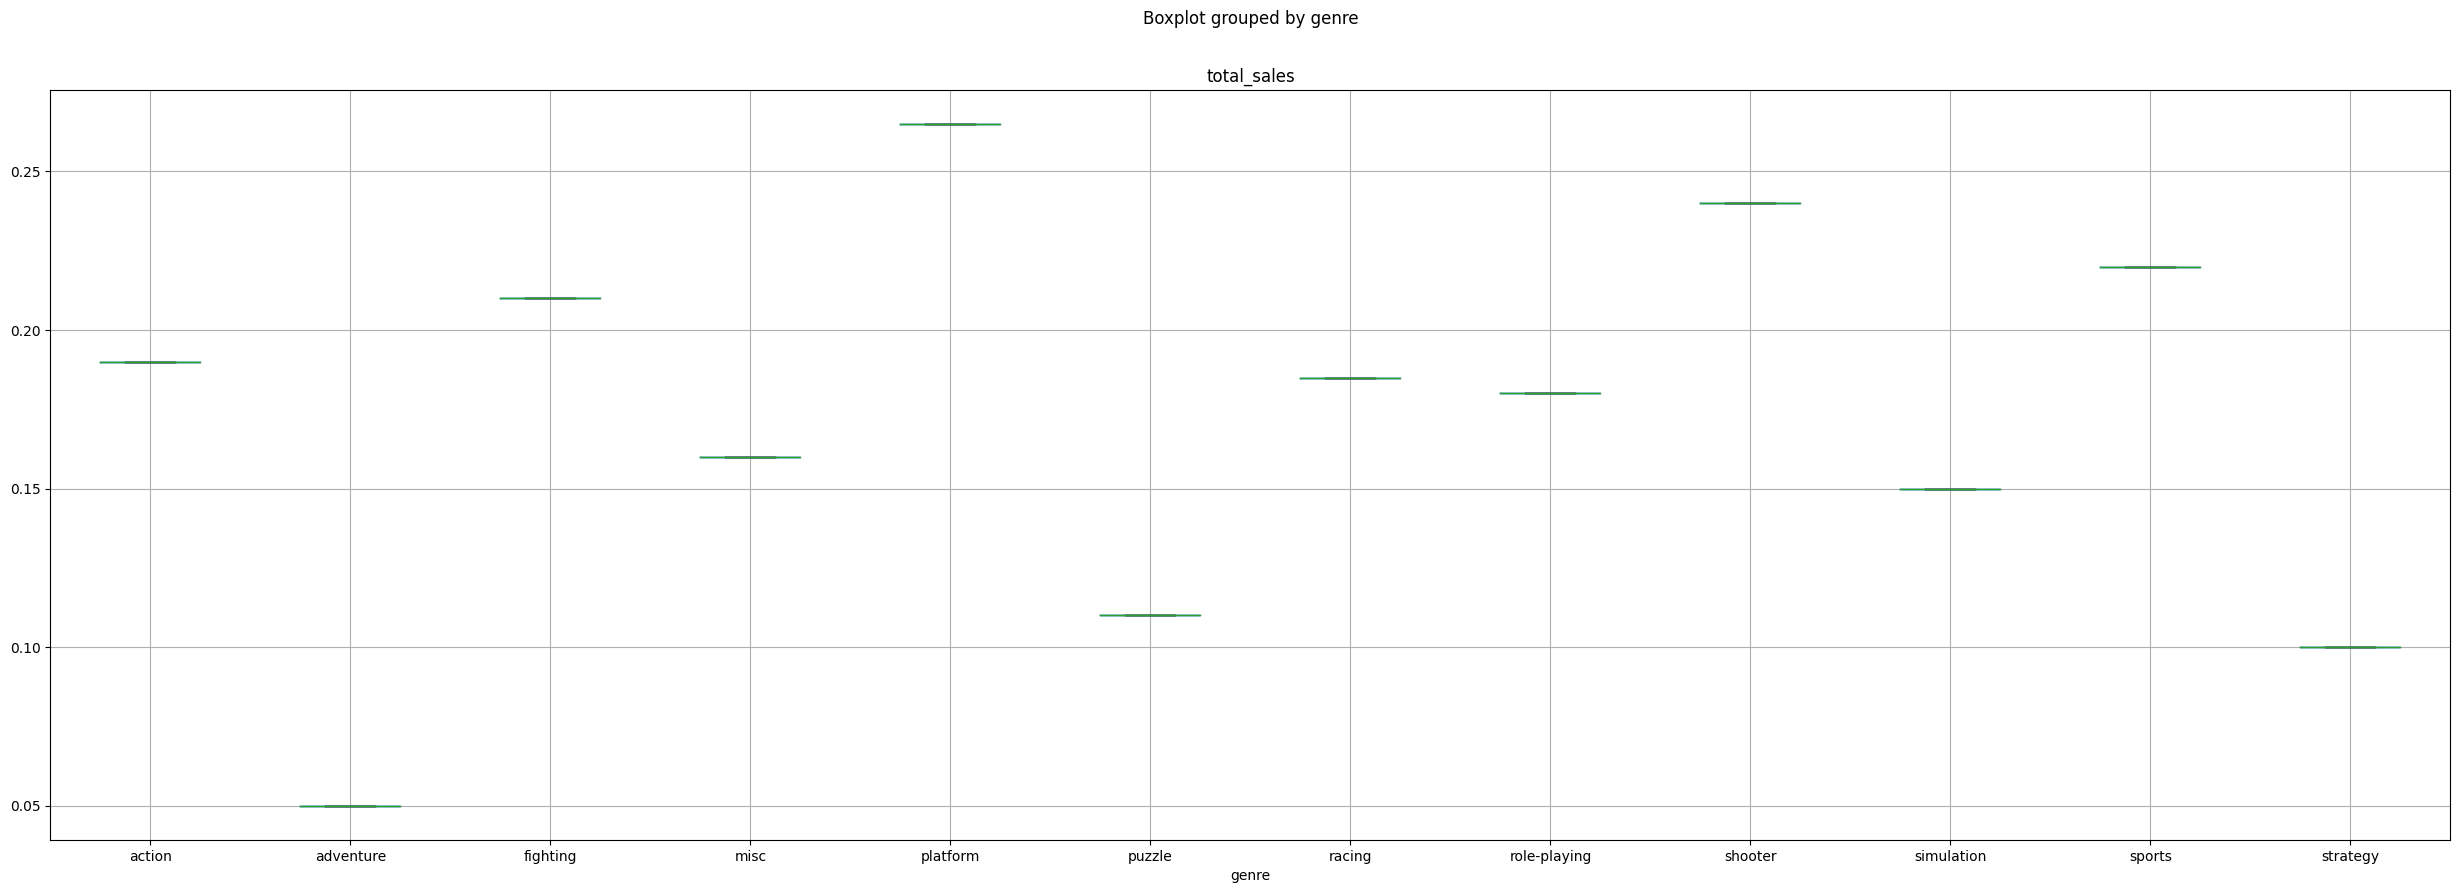

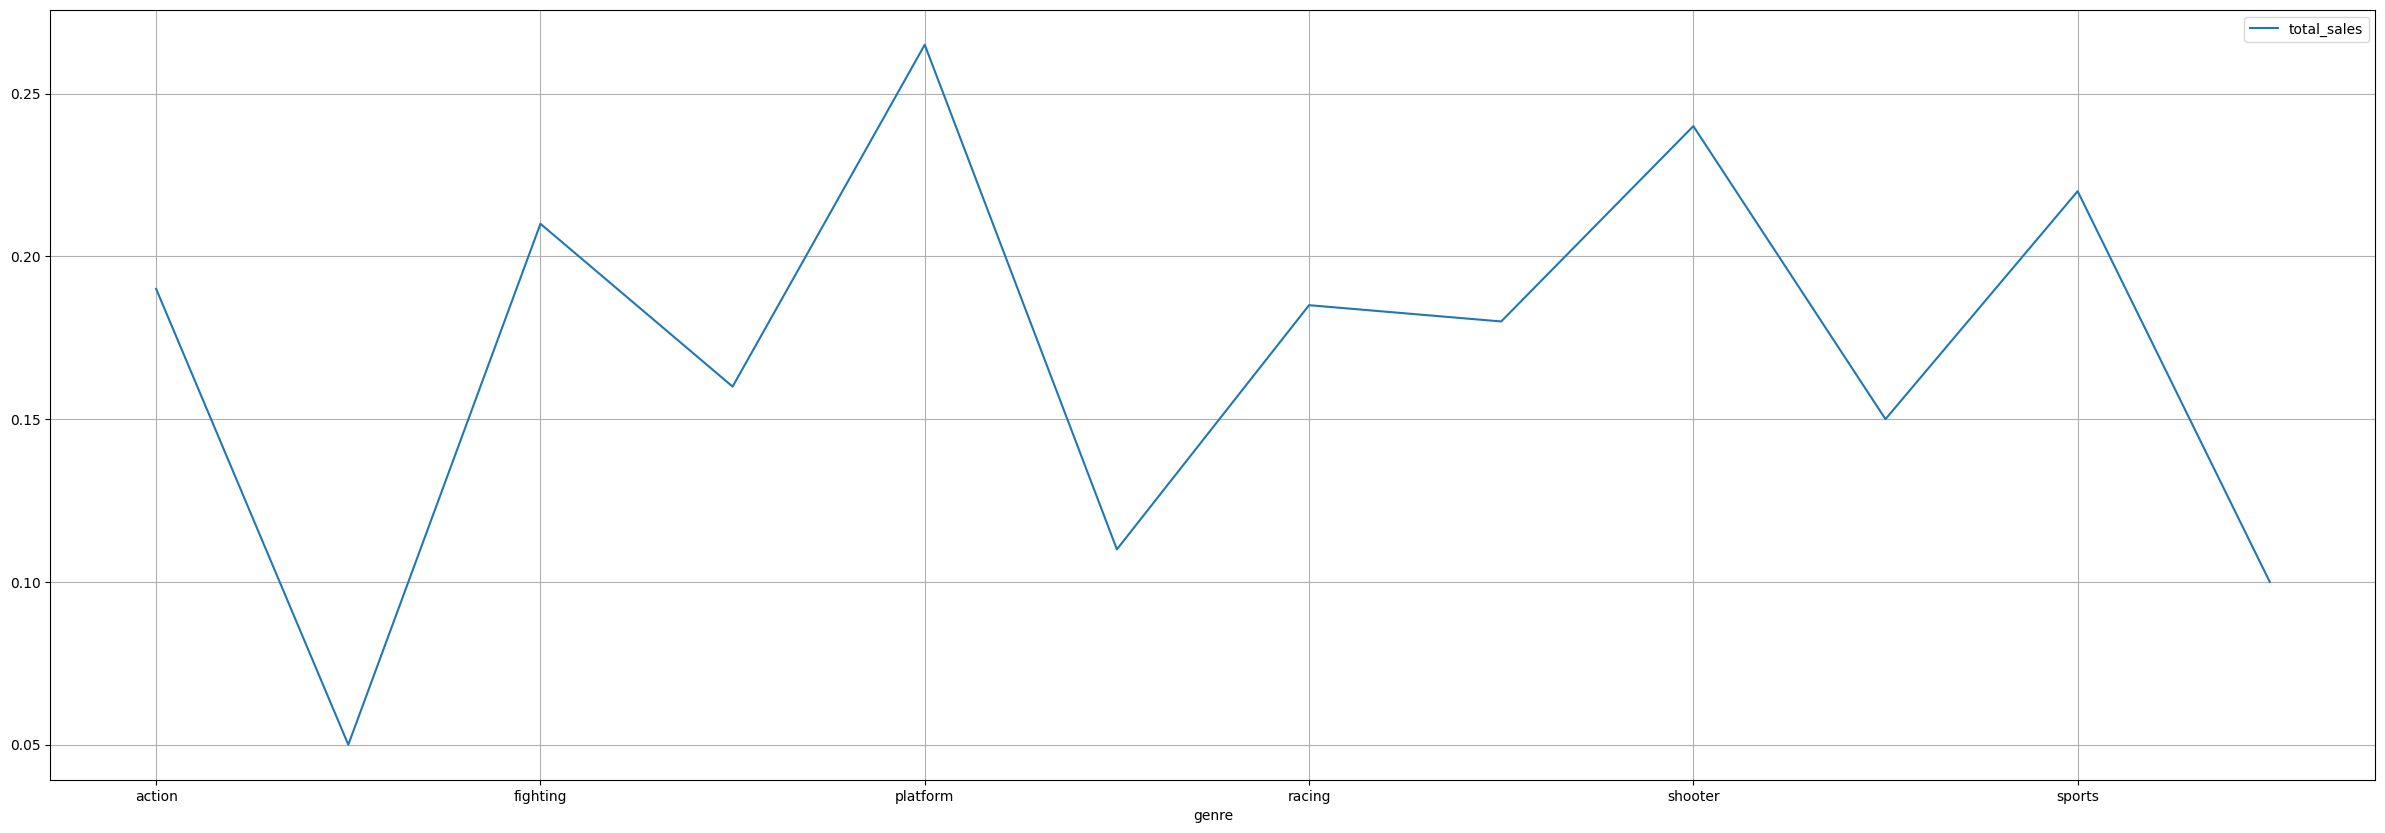

In [ ]:
(
    data.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .boxplot(column='total_sales', by='genre', figsize=(30,10))
)
plt.show()
(
data.pivot_table(index='genre', values='total_sales', aggfunc='median')
.plot(grid=True, figsize=(30, 10))
)
plt.show()

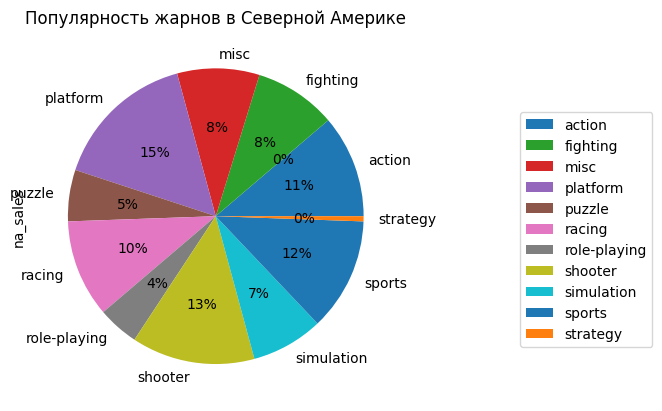

In [ ]:
fig, ax = plt.subplots()
(
data.pivot_table(index='genre', values='na_sales', aggfunc='median')
.plot(kind='pie',subplots=True, ax=ax, grid=True, figsize=(30, 10),autopct='%i%%')
)
plt.title('Популярность жарнов в Северной Америке')

ax.legend(loc='best', bbox_to_anchor=(1.7, 0.8))

plt.show()

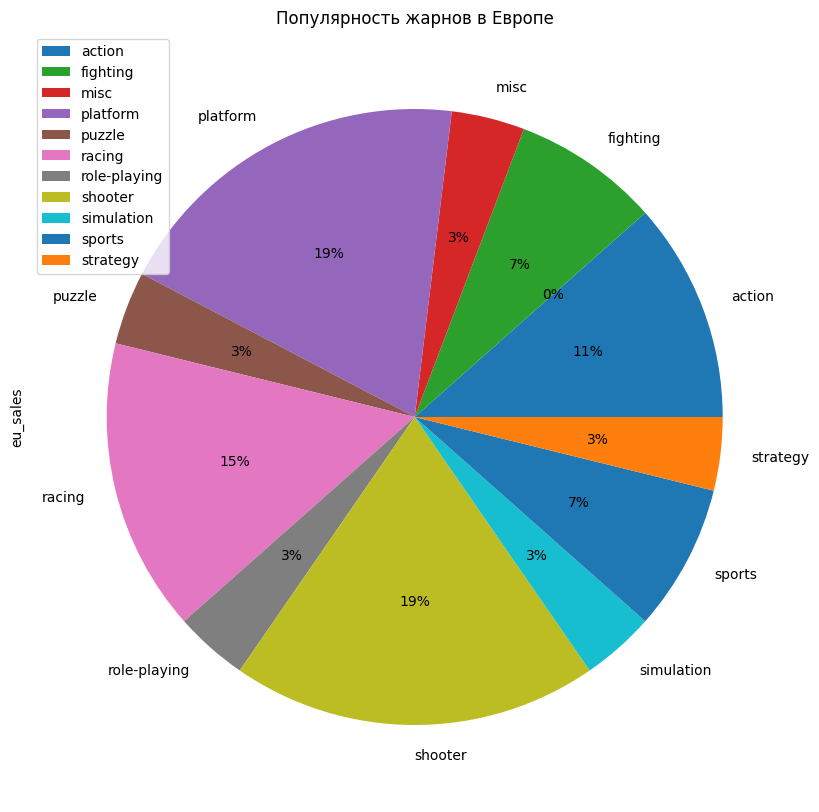

In [ ]:
(
data.pivot_table(index='genre', values='eu_sales', aggfunc='median')
.plot(kind='pie',subplots=True, grid=True, figsize=(30, 10),autopct='%i%%')
)
plt.title('Популярность жарнов в Европе')

ax.legend(loc='best', bbox_to_anchor=(1.7, 0.8))
plt.show()

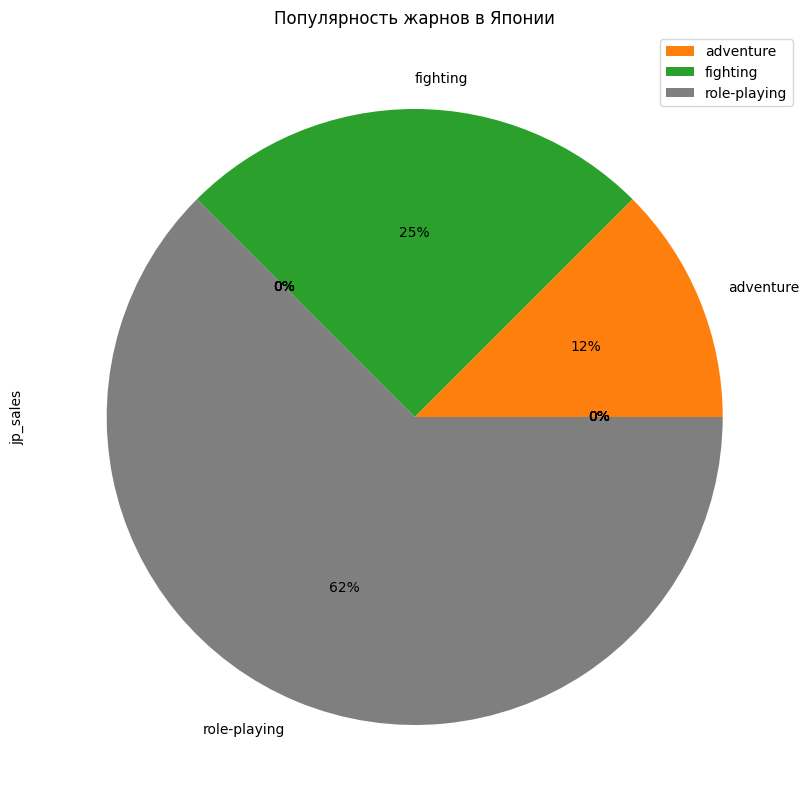

In [ ]:
(
data.pivot_table(index='genre', values='jp_sales', aggfunc='median')
.plot(kind='pie',subplots=True, grid=True, figsize=(30, 10),autopct='%i%%')
)
plt.title('Популярность жарнов в Японии')

ax.legend(loc='best', bbox_to_anchor=(1.7, 0.8))
plt.show()

На основе данных графиков мы видим, что самым популярным во всем мире является жанр 'platform', он же является самым популярным в Северной Америке, в Европе он занимает также первую позицию, но на равне с жанром 'shooter', однако в Японии этот жанр является непопулярным, там первое место занимает жанр 'role-playing'

Выведем средние, минимальные, максимальные оценки критиков и пользователей, а также сумму баллов по жанрам

In [ ]:
data_pivot_ratings = data.pivot_table(
    index='genre', values=['critic_score', 'user_score'], aggfunc=['mean', 'min', 'max', 'sum'],
    margins=True, margins_name='total'
)

data_pivot_ratings

mean                     min                     max  \
             critic_score user_score critic_score user_score critic_score   
genre                                                                       
action              36.92       3.38        -1.00      -1.00        98.00   
adventure           15.42       0.87        -1.00      -1.00        93.00   
fighting            32.83       2.90        -1.00      -1.00        98.00   
misc                19.19       0.96        -1.00      -1.00        93.00   
platform            37.64       3.00        -1.00      -1.00        97.00   
puzzle              25.34       0.81        -1.00      -1.00        90.00   
racing              39.93       3.12        -1.00      -1.00        96.00   
role-playing        35.28       3.28        -1.00      -1.00        96.00   
shooter             49.86       4.62        -1.00      -1.00        97.00   
simulation          27.17       2.22        -1.00      -1.00        92.00   
sports              36.10       2.74        -1.00      -1.00        98.00   
strategy            31.27       2.77        -1.00      -1.00        94.00   
total               33.06       2.69        -1.00      -1.00        98.00   

                                 sum             
             user_score critic_score user_score  
genre                                            
action             9.50   124,193.00  11,356.10  
adventure          9.40    20,060.00   1,132.10  
fighting           9.20    27,870.00   2,463.70  
misc               9.20    33,542.00   1,675.90  
platform           9.40    33,271.00   2,651.40  
puzzle             9.50    14,646.00     468.40  
racing             9.50    49,750.00   3,886.30  
role-playing       9.70    52,786.00   4,908.30  
shooter            9.30    65,813.00   6,103.90  
simulation         9.60    23,636.00   1,928.30  
sports             9.50    84,701.00   6,426.20  
strategy           9.40    21,329.00   1,889.60  
total              9.70   551,597.00  44,890.20

Мы видим, что самаую большую сумму оценок от критиков и пользователей имеет жанр 'action'

Посмотрим какую игру лучше всего оценили критики и пользователи

In [ ]:
data.sort_values('critic_score', ascending=False).head(1)[['name','critic_score']]

,name,critic_score
40,grand theft auto iv,98.00


In [ ]:
data.sort_values('user_score', ascending=False).head(1)[['name','user_score']]

,name,user_score
14395,breath of fire iii,9.70


Составьте «портрет» типичного пользователя платформы 'x360'

In [ ]:
new_data = data.query('platform == "x360"')
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
7,kinect adventures,x360,2010,misc,15.00,4.89,0.24,1.69,61.00,6.30,E,21.82,50.1-70.0,-
18,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88.00,3.40,M,14.73,70.1-100.0,popular
21,call of duty: black ops,x360,2010,shooter,9.70,3.68,0.11,1.13,87.00,6.30,M,14.62,70.1-100.0,popular
24,call of duty: black ops ii,x360,2012,shooter,8.25,4.24,0.07,1.12,83.00,4.80,M,13.68,70.1-100.0,popular
25,call of duty: modern warfare 2,x360,2009,shooter,8.52,3.59,0.08,1.28,94.00,6.30,M,13.47,70.1-100.0,popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,dragon ball z for kinect,x360,2012,fighting,0.01,0.00,0.00,0.00,49.00,2.10,T,0.01,30.1-50.0,-
16605,world snooker championship 2007,x360,2007,sports,0.00,0.01,0.00,0.00,-1.00,-1.00,no data,0.01,0.0-30.0,-
16630,metal gear solid hd edition,x360,2011,action,0.00,0.00,0.01,0.00,-1.00,-1.00,M,0.01,0.0-30.0,-
16637,ben 10 omniverse 2,x360,2013,action,0.00,0.01,0.00,0.00,-1.00,5.10,E10+,0.01,0.0-30.0,-


Выявим самую популярную игру на данной платформе

In [ ]:
new_data.sort_values('total_sales', ascending=False).head(1)[['name','total_sales']]

,name,total_sales
7,kinect adventures,21.82


Рассмотрим график популярности жанров на данной платформе

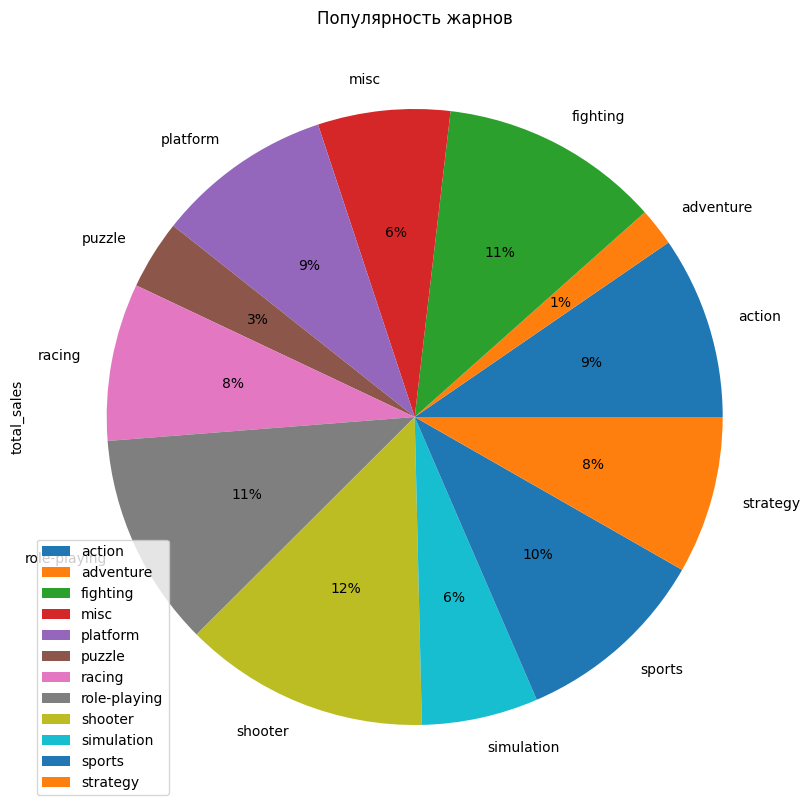

In [ ]:
(
new_data.pivot_table(index='genre', values='total_sales', aggfunc='median')
.plot(kind='pie',subplots=True, grid=True, figsize=(30, 10),autopct='%i%%')
)
plt.title('Популярность жарнов')

ax.legend(loc='best', bbox_to_anchor=(1.7, 0.8))
plt.show()

Мы видим, что популярность жанров распределена почти равномерно, но мы точно можем сказать, что самым популярным жанром является 'shooter', а самым непопулярным 'adventure'

Посмотрим общую сумму продаж игр разных жанров за каждый год

In [ ]:
data_pivot = new_data.pivot_table(
    index='genre', columns='year_of_release', values='total_sales', aggfunc='mean',
    margins=True,
    margins_name='total')

data_pivot

year_of_release,0,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
genre,,,,,,,,,,,,,,
action,0.49,0.25,0.46,0.39,1.24,0.69,0.83,0.62,0.85,0.73,0.47,0.22,0.16,0.69
adventure,NaN,NaN,NaN,2.83,0.26,0.11,0.06,0.35,0.34,0.02,0.10,0.31,0.03,0.31
fighting,NaN,0.46,0.45,0.85,0.81,1.02,0.50,0.51,0.27,0.95,0.11,0.23,NaN,0.57
misc,0.65,NaN,0.09,1.13,0.62,0.45,1.61,0.37,0.47,2.80,0.35,0.27,0.04,0.72
platform,NaN,NaN,0.57,0.57,0.55,0.16,0.14,0.77,NaN,0.49,NaN,0.09,0.10,0.45
puzzle,0.14,NaN,0.04,0.16,NaN,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12
racing,0.28,0.68,0.43,0.84,0.90,0.80,0.58,0.57,0.59,0.36,0.23,0.01,NaN,0.62
role-playing,NaN,NaN,0.86,0.69,1.41,0.56,1.27,1.28,0.90,0.84,0.46,NaN,NaN,0.95
shooter,0.22,1.06,0.98,1.70,1.31,1.22,1.48,1.47,2.48,1.15,1.03,0.78,0.04,1.36


Мы видим, что в 2013 году общая сумма продаж всех игр на данной платформе равна 0.98 миллиона долларов, с 2005 года по 2012 год платформа постепено набирала популярность, достигнув пика в 2013 году. С 2014 года по 2016 год платформа начала терять популярность, так как обшие продажи начали резко падать, в 2016 году платформа достигла минимума, собрав 0.12 миллионов долларов.

Выясним в какой стране игры с данной платформы собрали больше всего денег с продаж

In [ ]:
data_pivot_s = new_data.pivot_table(
    index='platform', values=['na_sales', 'eu_sales','jp_sales','other_sales','total_sales'], aggfunc=['sum']
)
data_pivot_s

sum                                          
         eu_sales jp_sales na_sales other_sales total_sales
platform                                                   
x360       265.62    12.37   592.81       84.35      955.15

<Axes: xlabel='platform'>

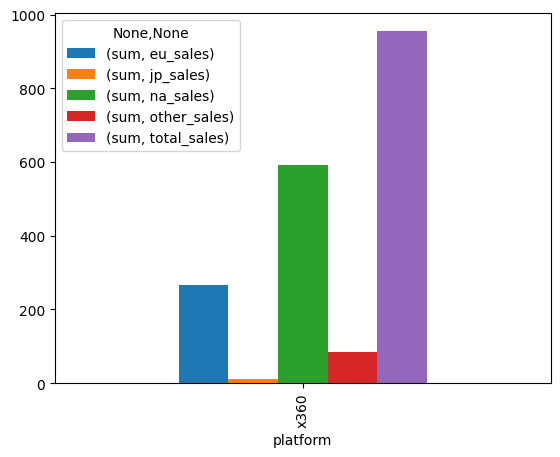

In [ ]:
data_pivot_s.plot(kind = 'bar')

На основе полученных данных мы видим, что в Северной Америке игры с данной платформы собрали 592.81 миллионов долларов, что составляет больше половины от общей суммы продаж по всему миру. Делаем вывод, что данная платформа наиболее успешна в Северной Америке

Посмотрим топ 5 игр с лучшими оценками от критиков и от пользователей

In [ ]:
new_data.sort_values('critic_score', ascending=False).head(5)[['name','critic_score']]

,name,critic_score
40,grand theft auto iv,98.00
502,bioshock,96.00
436,mass effect 2,96.00
949,the orange box,96.00
61,the elder scrolls v: skyrim,96.00


In [ ]:
new_data.sort_values('user_score', ascending=False).head(5)[['name','user_score']]

,name,user_score
10304,cabela's north american adventures,9.00
121,red dead redemption,9.00
436,mass effect 2,8.90
502,bioshock,8.90
949,the orange box,8.90


Мы видим, что мнения пользователей и критиков расходятся почти во всем, кроме одной игры(mass effect 2), которая входит в оба топа и занимает и там, и там **третье** место

И наконец посмотрим, сколько игр на данной платформе имеют статус 'popular'

In [ ]:
new_data.loc[new_data.loc[:, 'popular'] == 'popular']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
18,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88.00,3.40,M,14.73,70.1-100.0,popular
21,call of duty: black ops,x360,2010,shooter,9.70,3.68,0.11,1.13,87.00,6.30,M,14.62,70.1-100.0,popular
24,call of duty: black ops ii,x360,2012,shooter,8.25,4.24,0.07,1.12,83.00,4.80,M,13.68,70.1-100.0,popular
25,call of duty: modern warfare 2,x360,2009,shooter,8.52,3.59,0.08,1.28,94.00,6.30,M,13.47,70.1-100.0,popular
33,halo 3,x360,2007,shooter,7.97,2.81,0.13,1.21,94.00,7.80,M,12.12,70.1-100.0,popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,sacred 2: fallen angel,x360,2009,role-playing,0.29,0.16,0.04,0.05,71.00,7.30,M,0.54,70.1-100.0,popular
3718,nhl 14,x360,2013,sports,0.40,0.09,0.00,0.05,81.00,5.90,E10+,0.54,70.1-100.0,popular
3807,f.e.a.r. 2: project origin,x360,2009,shooter,0.32,0.15,0.00,0.05,77.00,8.00,M,0.52,70.1-100.0,popular
3810,tiger woods pga tour 11,x360,2010,sports,0.28,0.19,0.00,0.05,79.00,7.80,E,0.52,70.1-100.0,popular


Мы видим, что 303 игры имеют статус "popular", это значит, что данные игры получили высокую оценку от пользователей и критиков, а так же собрали более 0.52 миллионов долларов с продаж.

1. Проанализируйте статистические показатели (описательные статистики) для
числовых переменных датафрейма. Сделайте выводы

In [ ]:
data.select_dtypes(exclude=['object', 'bool']).describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,"16,684.00","1,974.14",252.79,0.00,"2,003.00","2,007.00","2,010.00","2,016.00"
na_sales,"16,684.00",0.25,0.64,0.00,0.00,0.08,0.24,23.20
eu_sales,"16,684.00",0.14,0.42,0.00,0.00,0.02,0.11,10.93
jp_sales,"16,684.00",0.08,0.29,0.00,0.00,0.00,0.04,10.22
other_sales,"16,684.00",0.05,0.17,0.00,0.00,0.01,0.03,10.57
critic_score,"16,684.00",33.06,36.30,-1.00,-1.00,-1.00,70.00,98.00
user_score,"16,684.00",2.69,4.17,-1.00,-1.00,-1.00,7.30,9.70
total_sales,"16,684.00",0.51,1.26,0.00,0.06,0.17,0.47,32.77


###Вывод
* В Северной Америке максимальная сумма продажи игры равна 23.20 миллионов долларов, минимальная сумма равна 0, среднее значение равно 0.25 миллиона долларов, стандартное отклонение равно 0.64 миллиона долларов, 0.25-квартиль = 0, 0.5-квартиль = 0,08, 0.75-квартиль = 0,24
* В Европе максимальная сумма продажи игры равна 10.93 миллионов долларов, минимальная сумма равна 0, среднее значение равно 0.14 миллиона долларов, стандартное отклонение равно 0.42 миллиона долларов, 0.25-квартиль = 0, 0.5-квартиль = 0,02, 0.75-квартиль = 0,11
* В Японии максимальная сумма продажи игры равна 10.22 миллионов долларов, минимальная сумма равна 0, среднее значение равно 0.08 миллиона долларов, стандартное отклонение равно 0.29 миллиона долларов, 0.25-квартиль = 0, 0.5-квартиль = 0, 0.75-квартиль = 0,04
* В остальных странах мира максимальная сумма продажи игры равна 710.57 миллионов долларов, минимальная сумма равна 0, среднее значение равно 0.05 миллиона долларов, стандартное отклонение равно 0.17 миллиона долларов, 0.25-квартиль = 0, 0.5-квартиль = 0,01, 0.75-квартиль = 0,03
* Во всем мире в целом максимальная сумма продажи игры равна 32.77 миллионов долларов, минимальная сумма равна 0, среднее значение равно 0.51 миллиона долларов,стандартное отклонение равно 1.26 миллиона долларов, 0.25-квартиль = 0,06, 0.5-квартиль = 0,17, 0.75-квартиль = 0,47
* Максимальная оценка критиков равна 98.0 баллов из 100, среднее значение оценок равно 33.06, стандартное отклонение равно 36.30, 0.75-квартиль = 70.00
* Максимальная оценка пользователей равна 9.7 баллов из 10, среднее значение оценок равно 2.69, стандартное отклонение равно 4.17, 0.75-квартиль = 7,3

In [ ]:
data.shape[0]

16684

###Вывод
В нашей выборке находится 16684 элементов

2. Выполните сравнение описательных статистик двух выборок: пользовательских
оценок и оценок критиков. Приведите графики. Сделайте выводы. (Примечание: при
сравнении разделите оценки критиков на 10).

In [ ]:
crit = data['critic_score'] / 10
crit

0        8.00
1       -0.10
2       -0.10
3        8.90
4        5.80
         ... 
16679   -0.10
16680   -0.10
16681   -0.10
16682   -0.10
16683   -0.10
Name: critic_score, Length: 16684, dtype: float64

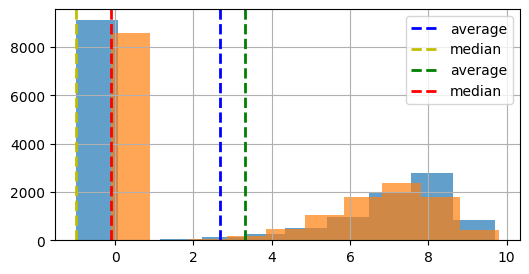

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))

data['user_score'].hist(alpha=0.7)
avg_visits = data['user_score'].mean()
median_visits = data['user_score'].median()

crit.hist(alpha=0.7)
avg_clicks = crit.mean()
median_clicks = crit.median()

ax.axvline(x=avg_visits, color='b', label='average', linestyle='--', linewidth=2)
ax.axvline(x=median_visits, color='y', label='median', linestyle='--', linewidth=2)

ax.axvline(x=avg_clicks, color='g', label='average', linestyle='--', linewidth=2)
ax.axvline(x=median_clicks, color='r', label='median', linestyle='--', linewidth=2)

ax.legend().set_visible(True)

* 'critic_score' - распределение асимметричное.
* 'user_score' - распределение асимметричное.

3. Рассчитайте и сравните разброс в пользовательских оценках и оценках критиков
для любого выбранного жанра (найдите межквартильный размах). Сделайте выводы

In [ ]:
data_gen = data[data['genre'] == 'role-playing']
data_gen

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
1,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,no data,31.38,0.0-30.0,-
5,pokemon gold/pokemon silver,gb,1999,role-playing,9.00,6.18,7.20,0.71,-1.00,-1.00,no data,23.09,0.0-30.0,-
13,pokemon diamond/pokemon pearl,ds,2006,role-playing,6.38,4.46,6.04,1.36,-1.00,-1.00,no data,18.24,0.0-30.0,-
16,pokemon black/pokemon white,ds,2010,role-playing,5.51,3.17,5.65,0.80,-1.00,-1.00,no data,15.13,0.0-30.0,-
19,pokémon yellow: special pikachu edition,gb,1998,role-playing,5.89,5.04,3.12,0.59,-1.00,-1.00,no data,14.64,0.0-30.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16602,knights in the nightmare: dhe series special pack,ds,2008,role-playing,0.00,0.00,0.01,0.00,-1.00,-1.00,no data,0.01,0.0-30.0,-
16608,tengai makyo: dai yon no mokushiroku,psp,2006,role-playing,0.00,0.00,0.01,0.00,-1.00,-1.00,no data,0.01,0.0-30.0,-
16618,blazer drive,ds,2008,role-playing,0.00,0.00,0.01,0.00,-1.00,-1.00,no data,0.01,0.0-30.0,-
16634,the rise of the argonauts,pc,2008,role-playing,0.00,0.01,0.00,0.00,-1.00,-1.00,no data,0.01,0.0-30.0,-


In [ ]:
data_gen['user_score'].quantile(0.25)

-1.0

0.25 квартиль для выборки 'user_score', жанра "role-playing" равен -1

In [ ]:
data_gen['user_score'].quantile(0.50)

-1.0

0.50 квартиль для выборки 'user_score', жанра "role-playing" равен -1

In [ ]:
data_gen['user_score'].quantile(0.75)

7.8

0.75 квартиль для выборки 'user_score', жанра "role-playing" равен 7.8

In [ ]:
data_gen['user_score'].quantile(0.75) - data_gen['user_score'].quantile(0.25)

8.8

Межквартильный диапазон для выборки равен 8.8, это значит что средние 50% значений в наборе данных имеют разброс 8.8

In [ ]:
data_gen['critic_score'].quantile(0.25)/10

-0.1

0.25 квартиль для выборки 'critic_score', жанра "role-playing" равен -0.1

In [ ]:
data_gen['critic_score'].quantile(0.50)/10

-0.1

0.50 квартиль для выборки 'critic_score', жанра "role-playing" равен -0.1

In [ ]:
data_gen['critic_score'].quantile(0.75)/10

7.3

0.75 квартиль для выборки 'critic_score', жанра "role-playing" равен 7.3

In [ ]:
(data_gen['critic_score'].quantile(0.75) - data_gen['critic_score'].quantile(0.25))/10

7.4

Межквартильный диапазон для выборки равен 7.4, это значит что средние 50% значений в наборе данных имеют разброс 7.4

4. Постройте гистограммы частот и «ящики с усами» для числовых переменных датафрейма. Проанализируйте и сделайте выводы по выбросам для каждого признака (для каждого столбца).

In [ ]:
stat = data.select_dtypes(exclude=['object', 'bool'])

In [ ]:
def plots(data, data_label, n_bins):

    a, axes = plt.subplots(1, 2, figsize=(16,4))

    axes[0].set_title('частота распределения', fontsize=14)
    axes[0].set_ylabel('частота', fontsize=14)
    axes[0].set_xlabel(data_label, fontsize=14)

    data.hist(bins=n_bins, ax=axes[0], edgecolor='black', linewidth=1)

    axes[1].set_title('boxplot', fontsize=14)
    axes[1].set_xlabel(data_label, fontsize=14)

    sns.boxplot(data=stat, x=data_label, ax=axes[1], linewidth=1)

    plt.show()

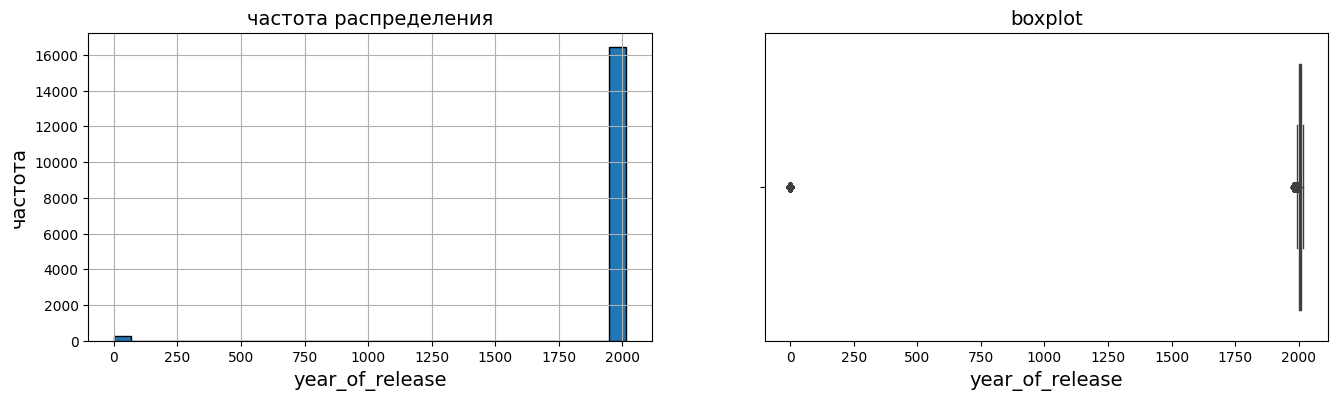

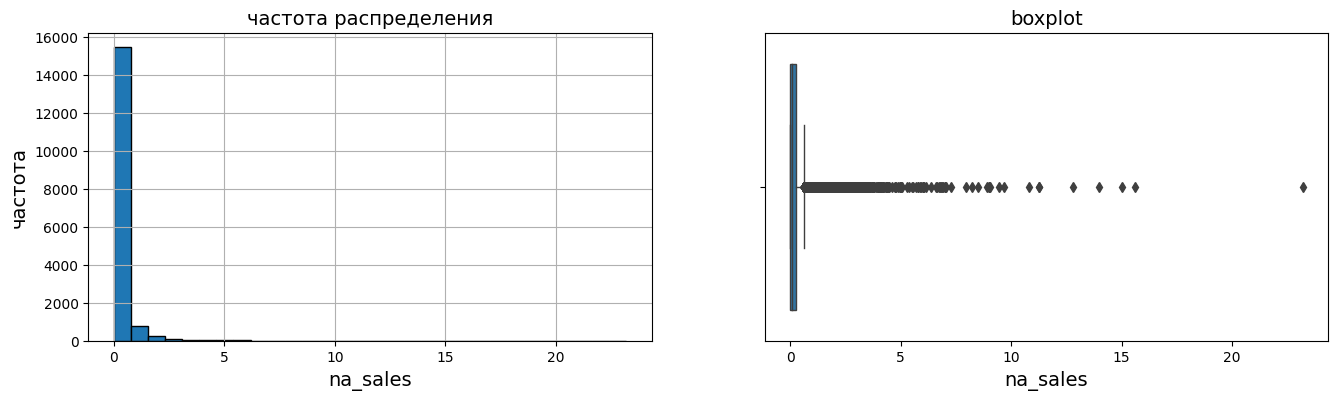

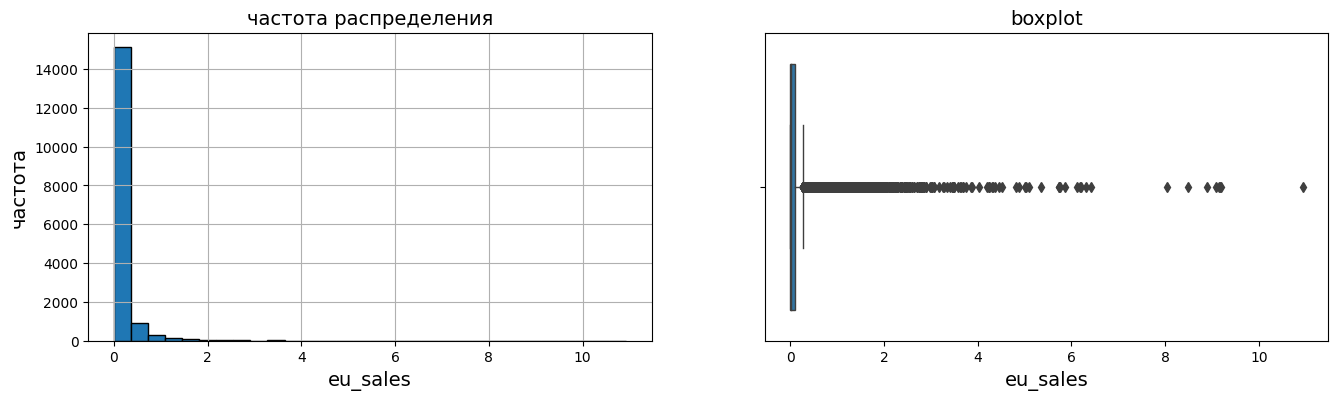

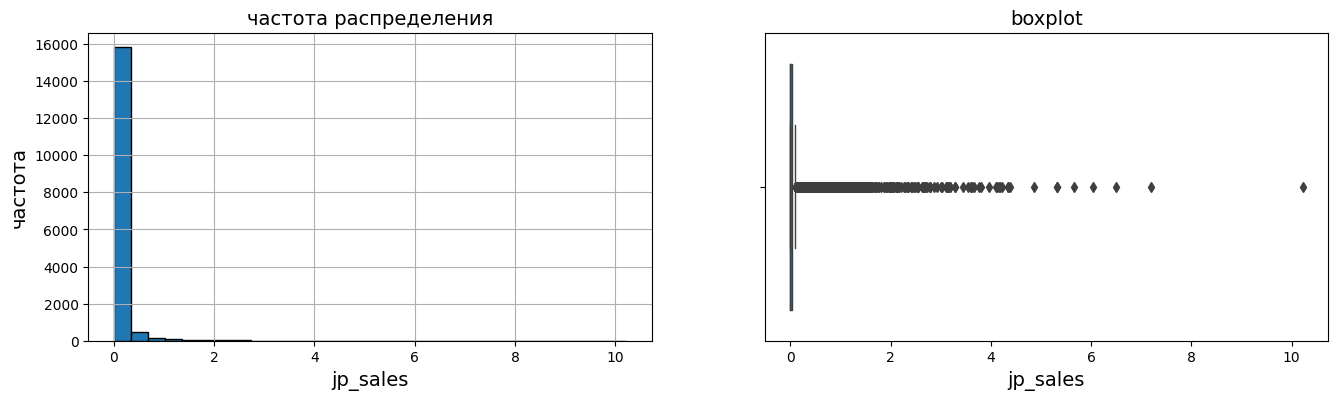

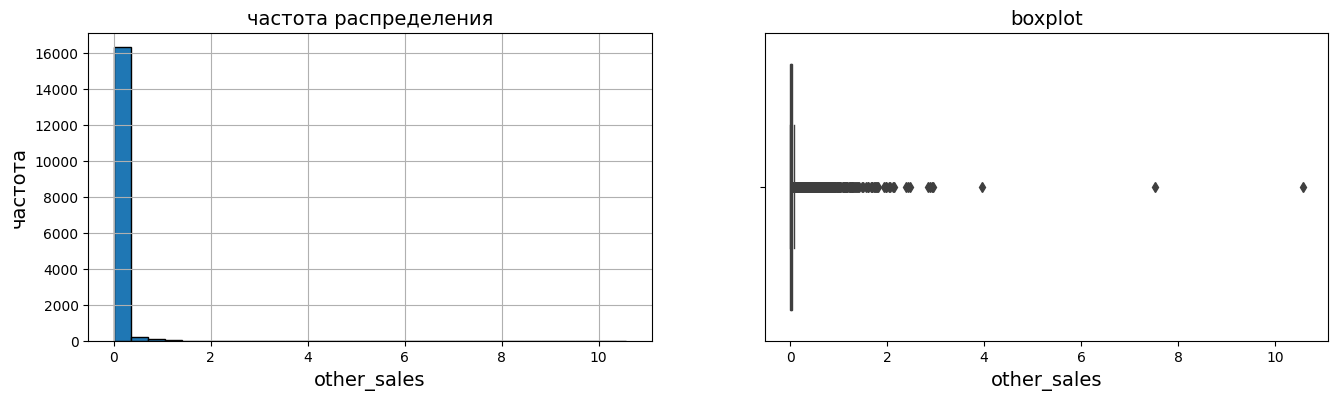

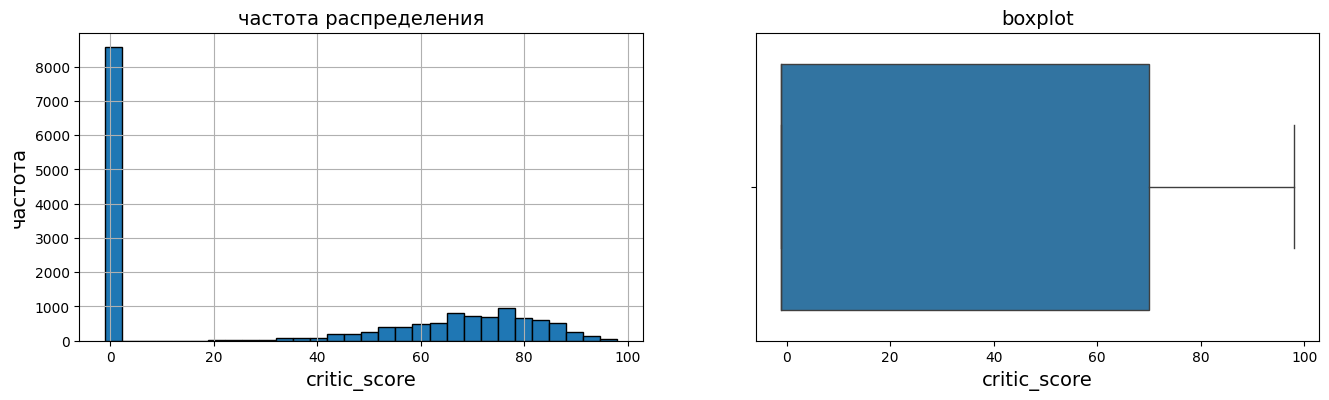

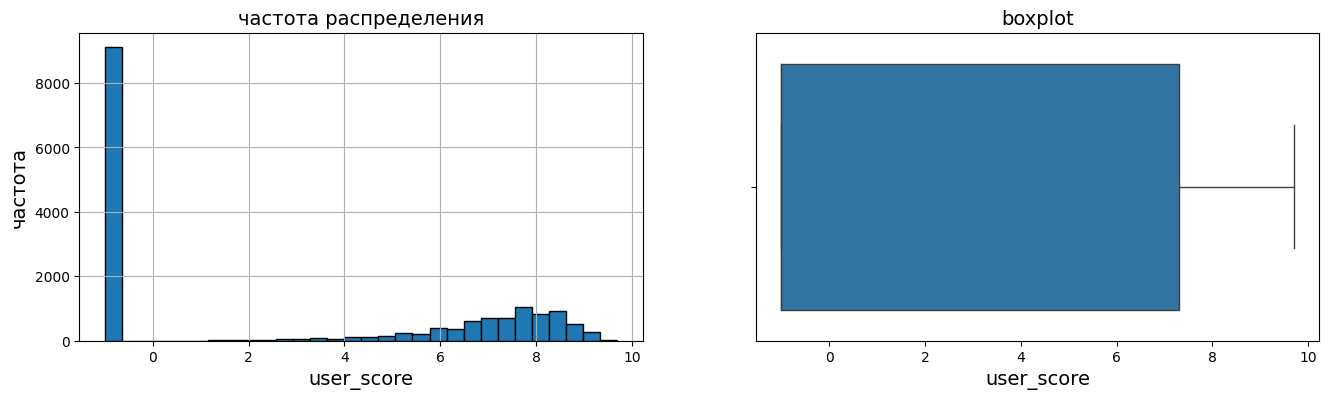

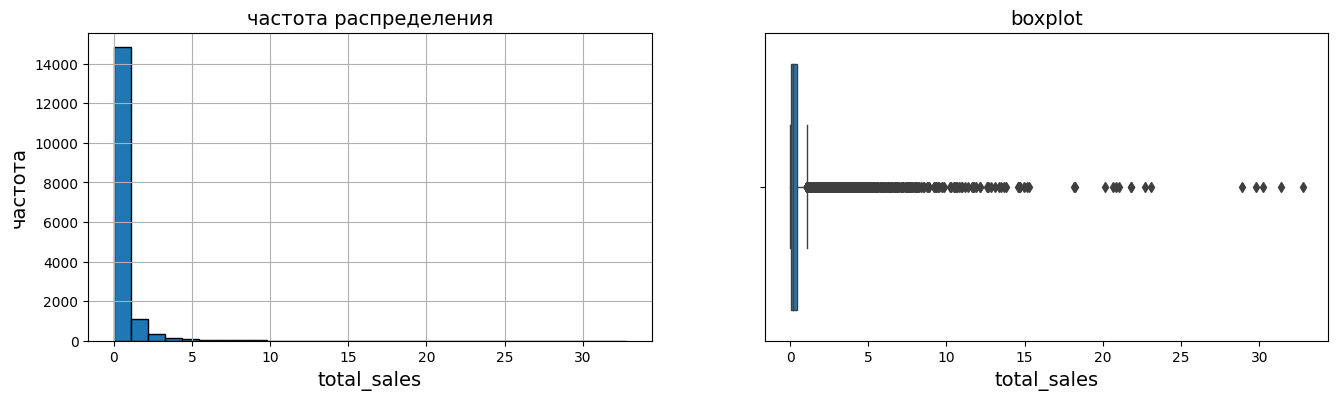

In [ ]:
for column in stat.columns:

    plots(stat[column], column, n_bins=30)

###Вывод
1. В столбце year_of_releas есть выбросы, но они относятся к 0-ому году, это строки, в которых не был указан год.
2. В столбце na_sales присутствует большое количество выбросов.
3. В столбце eu_sales присутствует большое количество выбросов.
4. В столбце jp_sales присутствует большое количество выбросов.
5. В столбце other_sales присутствует небольшое количество выбросов.
6. В столбце critic_score и user_score отсутствует левая граница(0.25 квартиль), а также отсутствуют выбросы.
7. В столбце total_sales присутствует большое количество выбросов.


5. Установите, есть ли линейная связь между числовыми признаками. Если есть, то
между какими признаками и насколько она сильная.

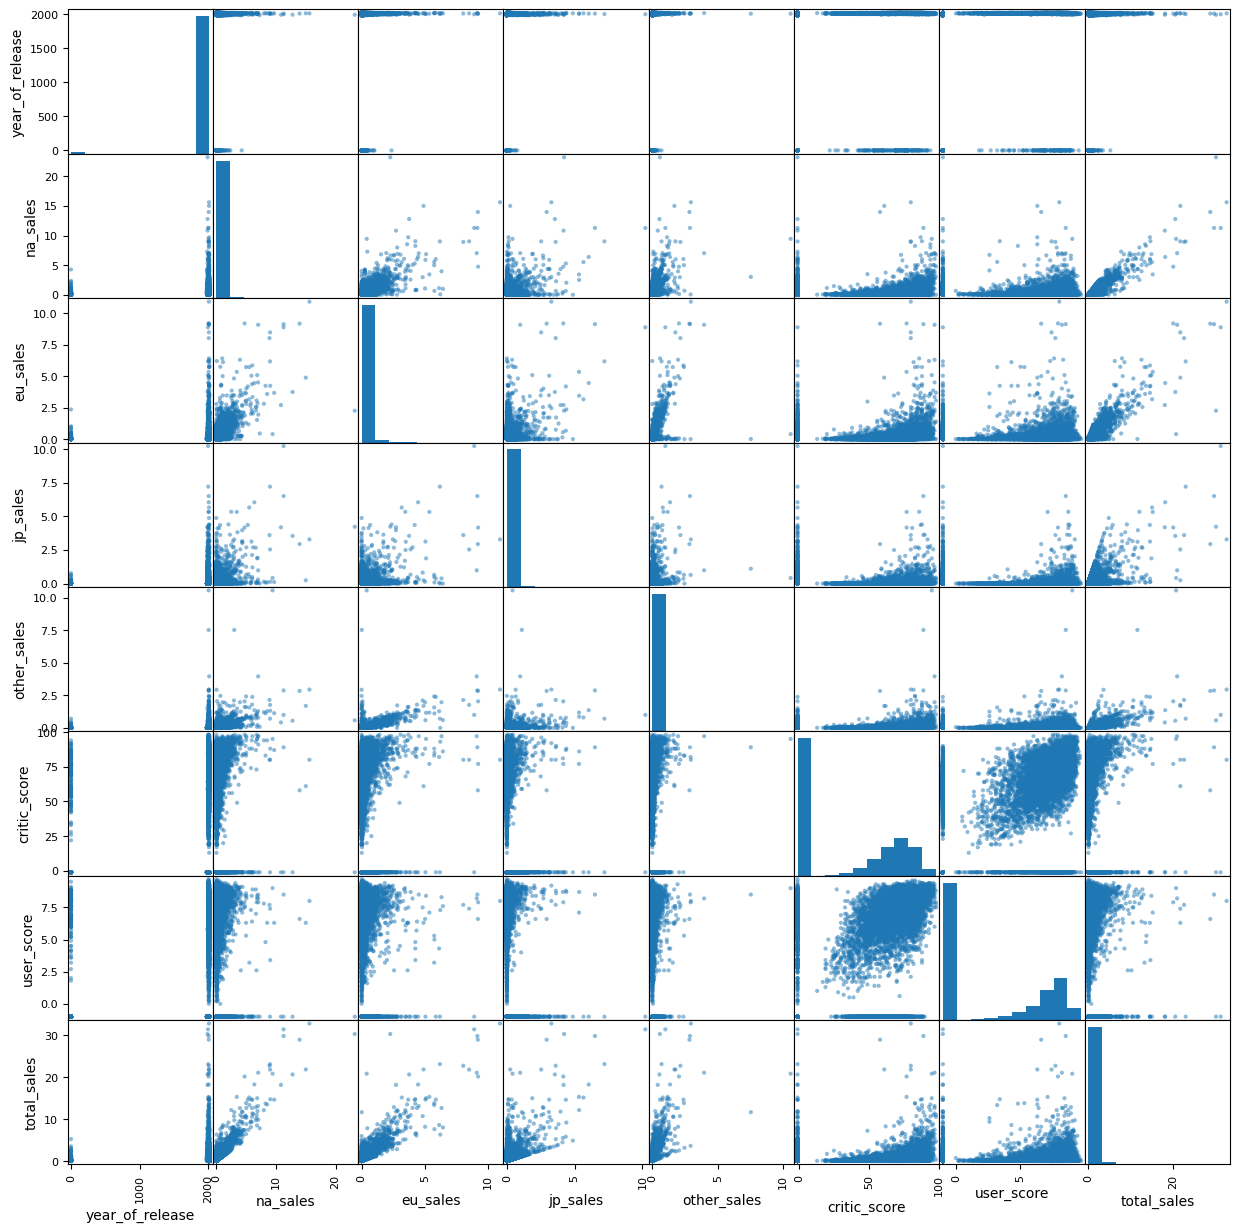

In [ ]:
pd.plotting.scatter_matrix(stat, figsize=(15, 15))

plt.show()

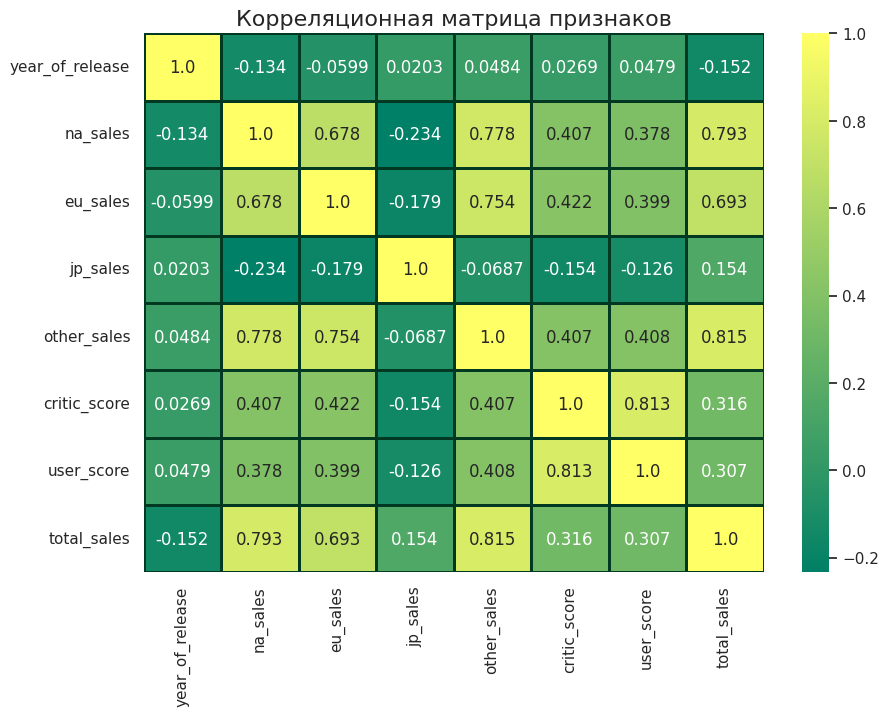

In [ ]:
sns.set(rc = {'figure.figsize':(10,7)})

sns.heatmap(stat.corr(method='spearman'), annot = True, fmt='.3', cmap= 'summer', linewidths=1, linecolor='#003822')

plt.title('Корреляционная матрица признаков', fontsize=16)

plt.show()

###Вывод
1. В столбцах na_sales и eu_sales присутствует слабая линейная зависимость.
2. В столбцах na_sales и total_sales присутствует сильная линейная зависимость.
3. В столбцах eu_sales и total_sales присутствует сильная линейная зависимость.
4. В столбцах jp_sales и eu_sales присутствует слабая линейная зависимость.
5. В столбцах jp_sales и total_sales присутствует слабая линейная зависимость.
6. В столбцах other_sales и eu_sales присутствует слабая линейная зависимость.
7. В столбцах other_sales и total_sales присутствует слабая линейная зависимость.
8. В столбцах critic_score и user_score присутствует сильная линейная зависимость.


# 4. Построение и обучение простейшей модели для задачи регрессии

**Объявление глобальных переменных**

In [ ]:
RANDOM_STATE=12345

**Отбор и выделение признаков**

In [ ]:
feature = data[['year_of_release', 'na_sales', 'jp_sales', 'other_sales', 'user_score', 'critic_score']]

**Целевую переменную поместим в переменную target**

In [ ]:
target = data['eu_sales']

In [ ]:
print(type(feature), type(target))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


**Разобьем данные на обучающую и тестовую выборку**

**Размер тестовой выборки составит 30%**

**Также зададим точку отсчета для воспроизводимости**

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(
  feature, target,
  test_size=0.3,
  random_state=RANDOM_STATE
)

**Посмотрим на новую размерность обучающей выборки**

In [ ]:
print(f'Признаки обучающей выборки: {features_train.shape}')
print(f'Целевой признак обучающей выборки: {target_train.shape}')

Признаки обучающей выборки: (11678, 6)
Целевой признак обучающей выборки: (11678,)


**Посмотрим на новую размерность тестовой выборки**

In [ ]:
print(f'Признаки тестовой выборки: {features_test.shape}')
print(f'Целевой признак тестовой выборки: {target_test.shape}')

Признаки тестовой выборки: (5006, 6)
Целевой признак тестовой выборки: (5006,)


**Обучение модели**

**Создадим объект этого класса и запишем в переменную model**

In [ ]:
%%time

model = LinearRegression()

CPU times: user 15 µs, sys: 2 µs, total: 17 µs
Wall time: 20.7 µs


**Обучим модель линейной регрессии**

In [ ]:
%%time

model.fit(features_train, target_train)

CPU times: user 17.3 ms, sys: 7.19 ms, total: 24.5 ms
Wall time: 56 ms


LinearRegression()

**На основе нескольких независимых переменных (feature) предскажем пользовательскую оценку (target)**

In [ ]:
target_pred = model.predict(features_test)

**Выведем первые пять значений с помощью диапазона индексов**

In [ ]:
print(target_pred[:5])

[ 0.14469618  0.11787759 -0.00277671  0.17566834  0.0178133 ]


In [ ]:
target_test

5764    0.00
5723    0.12
13145   0.00
3288    0.22
10617   0.02
        ... 
4418    0.00
9751    0.09
8780    0.00
2375    0.81
8048    0.04
Name: eu_sales, Length: 5006, dtype: float64

Модель имеет небольшие погрешности в предсказании данных

In [ ]:
coefficients = pd.DataFrame({'feature': feature.columns, 'coefficients' : model.coef_})
print(coefficients)

           feature  coefficients
0  year_of_release          0.00
1         na_sales          0.37
2         jp_sales          0.18
3      other_sales          0.56
4       user_score          0.00
5     critic_score          0.00


# Оценка качества модели

**Выведем корень среднеквадратической ошибки**

**Сравним тестовые и прогнозные значения оценок пользователей**

In [ ]:

print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(target_test, target_pred)))

Root Mean Squared Error (RMSE):  0.247645125354684


**Рассчитаем коэффициент детерминации **R2****

In [ ]:
print('R2:', np.round(metrics.r2_score(target_test, target_pred), 2))

R2: 0.6


Коэффицент детерминации R2 равен 0.6, что является средней точностью предсказания данных

**Предсказание для конкретной игры**

In [ ]:
new_game = pd.DataFrame({'year_of_release': [2023], 'na_sales': [1.54], 'jp_sales': [5.8], 'other_sales': [8.6], 'user_score': [8.2],'critic_score': [74]})
prediction = model.predict(new_game)

print(f"Predicted EU Sales game 'My life': {prediction[0]}")

Predicted EU Sales game 'My life': 6.491254942237893


Модель предсказала, что у данной игры сборы в Европе будут равны примерно на 6.49, что является достаточно высокой суммой продаж, тем самым игра будет успешна

# Вывод
- Модель иеет небольшие погрешности в предсказании данных
- Коэффицент детерминации R2 равен 0.6, что является средней точностью предсказания данных
- Модель предсказала, что у данной игры сборы в Европе будут равны примерно на 6.49, что является достаточно высокой суммой продаж, тем самым игра будет успешна

# 5. Общий вывод по проекту
<a id='общий_вывод_задание'></a>
[К содержанию](#общий_вывод)

В рамках учебного проекта «Выявление закономерностей, определяющих успешность компьютерных игр» был проанализирован датасет, содержащий информацию о комьютерных играх<br>

В ходе предварительного изучения и предобработки данных:
- В датафрейме 16686 записей, 11 столбцов.
- В Name, Year_of_Release, Genre, Critic_Scrore, User_Score, Rating столбцах имеются пропущенные значения.
- Нарушение стиля в заголовке столбца Name, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales , Critic_Scrore, Other_sales, User_Score, Rating , следует изменить регистр.
- Для ряда столбцов видится возможным Year_of_Release, User_Score, Rating для снижения нагрузки и удобства визуализации данных (отсутствия дробных частей в лейблах/подписях).
- В столбцах Name, Gener, Platform возможны дубликаты.
- Более детально необходимо посмотреть на строковые значения в столбцах Name, Platform, Gener (в некоторых наименованиях в конце строки - лишний символ точки); (использование различных символов для разделения нескольких стран).
- Все данные были приведены к нижнему регистру
- Все заголовки были приведены к "змеиному регистру"
- Были выявлены самые редкие платформы(pcfx, gg, tg16, 3do), жанры(puzzle, strategy) и годы(1980, 1985, 1984)
- 5 столбцов не содержат пропущенных значений.
- Значительное число пропусков в 2 столбцах (40%), в одном столбце (50%)
- В столбце name, gener 0.01% пропусков - 2 пропуска. Для столбца name видится возможным удалить строки, для столбца gener видится возможным поиск жанра в сети Интернет.
- В столбце year_of_release 1,61% пропусков возможен вариант поиска игр в сети Интернет и внесения отсутствующих значений согласно найденным на сторонних ресурсах. Но тогда придется вручную заполнять 269 записей. Для исследования год релиза игры может играть важную роль, но имеющихся 98.39% должно быть достаточно. Для данного столбца видится возможным оставить пропуски без изменений.
- Пропуски в столбце user_score были заполнены -1, так же в этом столбце был изменен тип данных с object на float
- В столбце name было удалено два столбца
- В столбце year_of_release пропуски были заполнены 0, так же в этом столбце был изменен тип данных с float на int
- Пропуски в столбце critic_score были заполнены -1
- Пропуски в столбце rating были заполнены no data
- Явных дубликатов в таблице не выявлено
- Пустых значений в записи не выявлено
- В столбце name были удалены лишнии символы
- В столбце rating возрастной рейтинг 'K-A' был заменен на 'E10+'
- Был добавлен столбец с общим количеством продаж во всех регионах
- Был добавлен столбец с категоризпцией данных по оценке критиков
- Был добавлен столбец с использованием функции для одной строки данных по оценке критиков и общим количеством продаж во всех регионах

Был проведен **исследовательский анализ** и получены следующие выводы:
- В Северной Америке игры на многих платформах имеют большую популярность
- Многие платформы в Японии, например 2600, являются не прибыльными
- Самым прибыльным жанром в Японии является role-playing
- На платформе ps2 было выпущено больше всего игр - 12.95% от всех выпущенных игр
- Наибольшее среднее значение по продажам в Японии принадлежит платформе role-playing
- Самым популярным жанром игр в Японии является role-playing
- Практически во всех странах средние продажи больше медианы суммы сборов

Был проведен **графический анализ данных** и получены следующие выводы:

- Игра "wil sports resort", которая является самой популярной в Северной Америке, является самой продаваемой во всем мире
- Самым популярным во всем мире является жанр 'platform', он же является самым популярным в Северной Америке, в Европе он занимает также первую позицию, но на равне с жанром 'shooter', однако в Японии этот жанр является непопулярным, там первое место занимает жанр 'role-playing'
- Самаую большую сумму оценок от критиков и пользователей имеет жанр 'action'
- В Северной Америке максимальная сумма продажи игры равна 23.20 миллионов долларов, минимальная сумма равна 0, среднее значение равно 0.25 миллиона долларов, стандартное отклонение равно 0.64 миллиона долларов, 0.25-квартиль = 0, 0.5-квартиль = 0,08, 0.75-квартиль = 0,24
- В Европе максимальная сумма продажи игры равна 10.93 миллионов долларов, минимальная сумма равна 0, среднее значение равно 0.14 миллиона долларов, стандартное отклонение равно 0.42 миллиона долларов, 0.25-квартиль = 0, 0.5-квартиль = 0,02, 0.75-квартиль = 0,11
- В Японии максимальная сумма продажи игры равна 10.22 миллионов долларов, минимальная сумма равна 0, среднее значение равно 0.08 миллиона долларов, стандартное отклонение равно 0.29 миллиона долларов, 0.25-квартиль = 0, 0.5-квартиль = 0, 0.75-квартиль = 0,04
- В остальных странах мира максимальная сумма продажи игры равна 710.57 миллионов долларов, минимальная сумма равна 0, среднее значение равно 0.05 миллиона долларов, стандартное отклонение равно 0.17 миллиона долларов, 0.25-квартиль = 0, 0.5-квартиль = 0,01, 0.75-квартиль = 0,03
- Во всем мире в целом максимальная сумма продажи игры равна 32.77 миллионов долларов, минимальная сумма равна 0, среднее значение равно 0.51 миллиона долларов,стандартное отклонение равно 1.26 миллиона долларов, 0.25-квартиль = 0,06, 0.5-квартиль = 0,17, 0.75-квартиль = 0,47
- Максимальная оценка критиков равна 98.0 баллов из 100, среднее значение оценок равно 33.06, стандартное отклонение равно 36.30, 0.75-квартиль = 70.00
- Максимальная оценка пользователей равна 9.7 баллов из 10, среднее значение оценок равно 2.69, стандартное отклонение равно 4.17, 0.75-квартиль = 7,3
- В столбце year_of_releas есть выбросы, но они относятся к 0-ому году, это строки, в которых не был указан год.
- В столбце na_sales присутствует большое количество выбросов.
- В столбце eu_sales присутствует большое количество выбросов.
- В столбце jp_sales присутствует большое количество выбросов.
- В столбце other_sales присутствует небольшое количество выбросов.
- В столбце critic_score и user_score отсутствует левая граница(0.25 квартиль), а также отсутствуют выбросы.
- В столбце total_sales присутствует большое количество выбросов
- В столбцах na_sales и eu_sales присутствует слабая линейная зависимость.
- В столбцах na_sales и total_sales присутствует сильная линейная зависимость.
- В столбцах eu_sales и total_sales присутствует сильная линейная зависимость.
- В столбцах jp_sales и eu_sales присутствует слабая линейная зависимость.
- В столбцах jp_sales и total_sales присутствует слабая линейная зависимость.
- В столбцах other_sales и eu_sales присутствует слабая линейная зависимость.
- В столбцах other_sales и total_sales присутствует слабая линейная зависимость.
- В столбцах critic_score и user_score присутствует сильная линейная зависимость.



Было проведено **построение и обучение простейшей модели для задачи регрессиии** получены следующие выводы:
- Модель иеет небольшие погрешности в предсказании данных
- Root Mean Squared Error (RMSE) равен 0.247645125354684
- Коэффицент детерминации R2 равен 0.6, что является средней точностью предсказания данных
- Модель предсказала, что у данной игры сборы в Европе будут равны примерно на 6.49, что является достаточно высокой суммой продаж, тем самым игра будет успешна

**Обобщающий вывод по проекту:**

Благодаря проделанной работе, я смогла достичь поставленные цели, а именно :

- изучить рынок компьютерных игр и выявить текущие тренды;
- установить, какие игры вызывают интерес у покупателей;
- оценить текущее состояние рынка компьютерных игр и возможные перспективы.

Для достижения данной цели я выполнила ряд поставленных задач:

- изучила рынок компьютерных игр и выявить текущие тренды;
- установила, какие игры вызывают интерес у покупателей;
- оценила текущее состояние рынка компьютерных игр и возможные перспективы.

В конечном итоге мы имеем готовый проект, который содержит в себе все необходимые шаги для правильного построения и обучения простейшей модели для задачи регрессии.